In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import glob

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from datetime import timedelta

In [3]:

# # check if required files exist
# required_files = ['test.csv', 'train.csv', 'sample_submission.csv']
# files_exist = all(os.path.exists(os.path.join('../data', f)) for f in required_files)

# # if not files_exis then unzip the data
# if not files_exist:
#     import zipfile
#     import shutil
#     with zipfile.ZipFile('../data/brist1d.zip', 'r') as zip_file:
#         zip_file.extractall('../data')
#     # handle extra nested folder
#     extra_data_path = '../data/data'
#     if os.path.exists(extra_data_path):
#         shutil.rmtree(extra_data_path)

In [42]:
# load data
train_data_path = '/content/train.csv'
test_data_path = '/content/test.csv'
sample_submission_path = '/content/sample_submission.csv'

train_column_names = pd.read_csv(train_data_path, nrows=0).columns

dtype_dict = {col: 'float64' for col in train_column_names if (col.startswith('bg-') or col.startswith('insulin-') or col.startswith('carbs-') or col.startswith('hr-') or col.startswith('steps-') or col.startswith('cals-'))}
dtype_dict.update({col: 'category' for col in train_column_names if (col.startswith('activity-') or col.startswith('p_num') or col.startswith('time'))})

train_data = pd.read_csv(train_data_path, dtype=dtype_dict)
test_data = pd.read_csv(test_data_path, dtype=dtype_dict)

train_data.head()

p_num      time   bg-5:55   bg-5:50  bg-5:45   bg-5:40   bg-5:35  bg-5:30  \
0     0  06:10:00  8.211018  8.230449      9.6  8.210988  8.229649      9.7   
1     0  06:25:00  8.211018  8.230449      9.7  8.210988  8.229649      9.2   
2     0  06:40:00  8.211018  8.230449      9.2  8.210988  8.229649      8.7   
3     0  06:55:00  8.211018  8.230449      8.7  8.210988  8.229649      8.4   
4     0  07:10:00  8.211018  8.230449      8.4  8.210988  8.229649      8.1   

    bg-5:25   bg-5:20  ...  cals-0:40  cals-0:35  cals-0:30  cals-0:25  \
0  8.211049  8.228888  ...   9.364063   9.364096   9.362525   9.366591   
1  8.211049  8.228888  ...   9.364063   9.364096   9.362525   9.366591   
2  8.211049  8.228888  ...   9.364063   9.364096   9.362525   9.366591   
3  8.211049  8.228888  ...   9.364063   9.364096   9.362525   9.366591   
4  8.211049  8.228888  ...   9.364063   9.364096   9.362525   9.366591   

   cals-0:20  cals-0:15  cals-0:10  cals-0:05  cals-0:00  bg+1:00  
0   9.368108   9.366998    9.37001   9.372536    9.36896     13.4  
1   9.368108   9.366998    9.37001   9.372536    9.36896     12.8  
2   9.368108   9.366998    9.37001   9.372536    9.36896     15.5  
3   9.368108   9.366998    9.37001   9.372536    9.36896     14.8  
4   9.368108   9.366998    9.37001   9.372536    9.36896     12.7  

[5 rows x 363 columns]

In [3]:
test_data.head()

id p_num      time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  \
0  p01_8459   p01  06:45:00      NaN      9.2      NaN      NaN     10.2   
1  p01_8460   p01  11:25:00      NaN      NaN      9.9      NaN      NaN   
2  p01_8461   p01  14:45:00      NaN      5.5      NaN      NaN      5.5   
3  p01_8462   p01  04:30:00      NaN      3.4      NaN      NaN      3.9   
4  p01_8463   p01  04:20:00      NaN      NaN      8.3      NaN      NaN   

   bg-5:30  bg-5:25  ...  activity-0:45  activity-0:40  activity-0:35  \
0      NaN      NaN  ...            NaN            NaN            NaN   
1      9.4      NaN  ...            NaN            NaN            NaN   
2      NaN      NaN  ...            NaN            NaN            NaN   
3      NaN      NaN  ...            NaN            NaN            NaN   
4     10.0      NaN  ...            NaN            NaN            NaN   

   activity-0:30  activity-0:25  activity-0:20  activity-0:15  activity-0:10  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN           Walk   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   

   activity-0:05  activity-0:00  
0            NaN            NaN  
1           Walk           Walk  
2            NaN            NaN  
3            NaN            NaN  
4            NaN            NaN  

[5 rows x 507 columns]

In [43]:
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (177024, 363)
Test data shape: (3644, 507)


In [44]:
# Removing the first id column which is useless
train_data.drop(['id'], axis=1, errors='ignore', inplace=True)
test_data.drop(['id'], axis=1, errors='ignore', inplace=True)

train_data.head()

p_num      time   bg-5:55   bg-5:50  bg-5:45   bg-5:40   bg-5:35  bg-5:30  \
0     0  06:10:00  8.211018  8.230449      9.6  8.210988  8.229649      9.7   
1     0  06:25:00  8.211018  8.230449      9.7  8.210988  8.229649      9.2   
2     0  06:40:00  8.211018  8.230449      9.2  8.210988  8.229649      8.7   
3     0  06:55:00  8.211018  8.230449      8.7  8.210988  8.229649      8.4   
4     0  07:10:00  8.211018  8.230449      8.4  8.210988  8.229649      8.1   

    bg-5:25   bg-5:20  ...  cals-0:40  cals-0:35  cals-0:30  cals-0:25  \
0  8.211049  8.228888  ...   9.364063   9.364096   9.362525   9.366591   
1  8.211049  8.228888  ...   9.364063   9.364096   9.362525   9.366591   
2  8.211049  8.228888  ...   9.364063   9.364096   9.362525   9.366591   
3  8.211049  8.228888  ...   9.364063   9.364096   9.362525   9.366591   
4  8.211049  8.228888  ...   9.364063   9.364096   9.362525   9.366591   

   cals-0:20  cals-0:15  cals-0:10  cals-0:05  cals-0:00  bg+1:00  
0   9.368108   9.366998    9.37001   9.372536    9.36896     13.4  
1   9.368108   9.366998    9.37001   9.372536    9.36896     12.8  
2   9.368108   9.366998    9.37001   9.372536    9.36896     15.5  
3   9.368108   9.366998    9.37001   9.372536    9.36896     14.8  
4   9.368108   9.366998    9.37001   9.372536    9.36896     12.7  

[5 rows x 363 columns]

In [45]:
train_data.describe()

bg-5:55        bg-5:50        bg-5:45        bg-5:40  \
count  177024.000000  177024.000000  177024.000000  177024.000000   
mean        8.211018       8.230449       8.253291       8.210988   
std         2.623458       2.757081       2.829664       2.623334   
min         2.200000       2.200000       2.200000       2.200000   
25%         6.400000       6.300000       6.200000       6.400000   
50%         8.211018       8.000000       7.900000       8.210988   
75%         9.300000       9.500000       9.600000       9.300000   
max        22.200000      25.100000      27.800000      22.200000   

             bg-5:35        bg-5:30        bg-5:25        bg-5:20  \
count  177024.000000  177024.000000  177024.000000  177024.000000   
mean        8.229649       8.254083       8.211049       8.228888   
std         2.752644       2.835156       2.623420       2.748301   
min         2.200000       2.200000       2.200000       2.200000   
25%         6.300000       6.200000       6.400000       6.300000   
50%         8.000000       7.900000       8.211049       8.000000   
75%         9.500000       9.600000       9.300000       9.500000   
max        25.100000      27.800000      22.200000      25.100000   

             bg-5:15        bg-5:10  ...      cals-0:40      cals-0:35  \
count  177024.000000  177024.000000  ...  177024.000000  177024.000000   
mean        8.254602       8.211000  ...       9.364063       9.364096   
std         2.840614       2.623584  ...       7.168274       7.168951   
min         2.200000       2.200000  ...       0.030000       0.030000   
25%         6.200000       6.400000  ...       5.850000       5.850000   
50%         7.900000       8.211000  ...       6.930000       6.930000   
75%         9.600000       9.300000  ...       9.364063       9.364096   
max        27.800000      22.200000  ...     116.100000     116.100000   

           cals-0:30      cals-0:25      cals-0:20      cals-0:15  \
count  177024.000000  177024.000000  177024.000000  177024.000000   
mean        9.362525       9.366591       9.368108       9.366998   
std         7.173446       7.174531       7.174680       7.179775   
min         0.030000       0.030000       0.030000       0.030000   
25%         5.850000       5.850000       5.850000       5.850000   
50%         6.930000       6.930000       6.930000       6.930000   
75%         9.362525       9.366591       9.368108       9.366998   
max       116.100000     116.100000     116.100000     116.100000   

           cals-0:10      cals-0:05      cals-0:00        bg+1:00  
count  177024.000000  177024.000000  177024.000000  177024.000000  
mean        9.370010       9.372536       9.368960       8.277045  
std         7.178427       7.179827       7.180021       2.996398  
min         0.030000       0.030000       0.030000       2.200000  
25%         5.850000       5.850000       5.850000       6.100000  
50%         6.930000       6.930000       6.930000       7.700000  
75%         9.370010       9.372536       9.368960       9.900000  
max       116.100000     116.100000     116.100000      27.800000  

[8 rows x 361 columns]

In [46]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

p_num        0
time         0
bg-5:55      0
bg-5:50      0
bg-5:45      0
            ..
cals-0:15    0
cals-0:10    0
cals-0:05    0
cals-0:00    0
bg+1:00      0
Length: 363, dtype: int64
p_num               0
time                0
bg-5:55           984
bg-5:50           583
bg-5:45           486
                 ... 
activity-0:20    3580
activity-0:15    3587
activity-0:10    3586
activity-0:05    3581
activity-0:00    3583
Length: 506, dtype: int64


In [47]:
train_total_missing = (train_data.isnull().sum().sum() / (train_data.shape[0] * train_data.shape[1])) * 100
test_total_missing = (test_data.isnull().sum().sum() / (test_data.shape[0] * test_data.shape[1])) * 100
print(train_total_missing)
print(test_total_missing)

10.68621969547576
46.771833497481374


In [48]:
train_missing_percent = train_data.isnull().mean() * 100
test_missing_percent = test_data.isnull().mean() * 100
print(train_missing_percent[train_missing_percent > 0])
print(test_missing_percent[test_missing_percent > 0])

steps-5:55    54.055382
steps-5:50    54.039565
steps-5:45    54.031092
steps-5:40    54.044649
steps-5:35    54.033351
                ...    
steps-0:20    53.768980
steps-0:15    53.722094
steps-0:10    53.661650
steps-0:05    53.759377
steps-0:00    53.712491
Length: 72, dtype: float64
bg-5:55          27.003293
bg-5:50          15.998902
bg-5:45          13.336992
bg-5:40          27.058178
bg-5:35          16.437980
                   ...    
activity-0:20    98.243688
activity-0:15    98.435785
activity-0:10    98.408342
activity-0:05    98.271131
activity-0:00    98.326015
Length: 504, dtype: float64


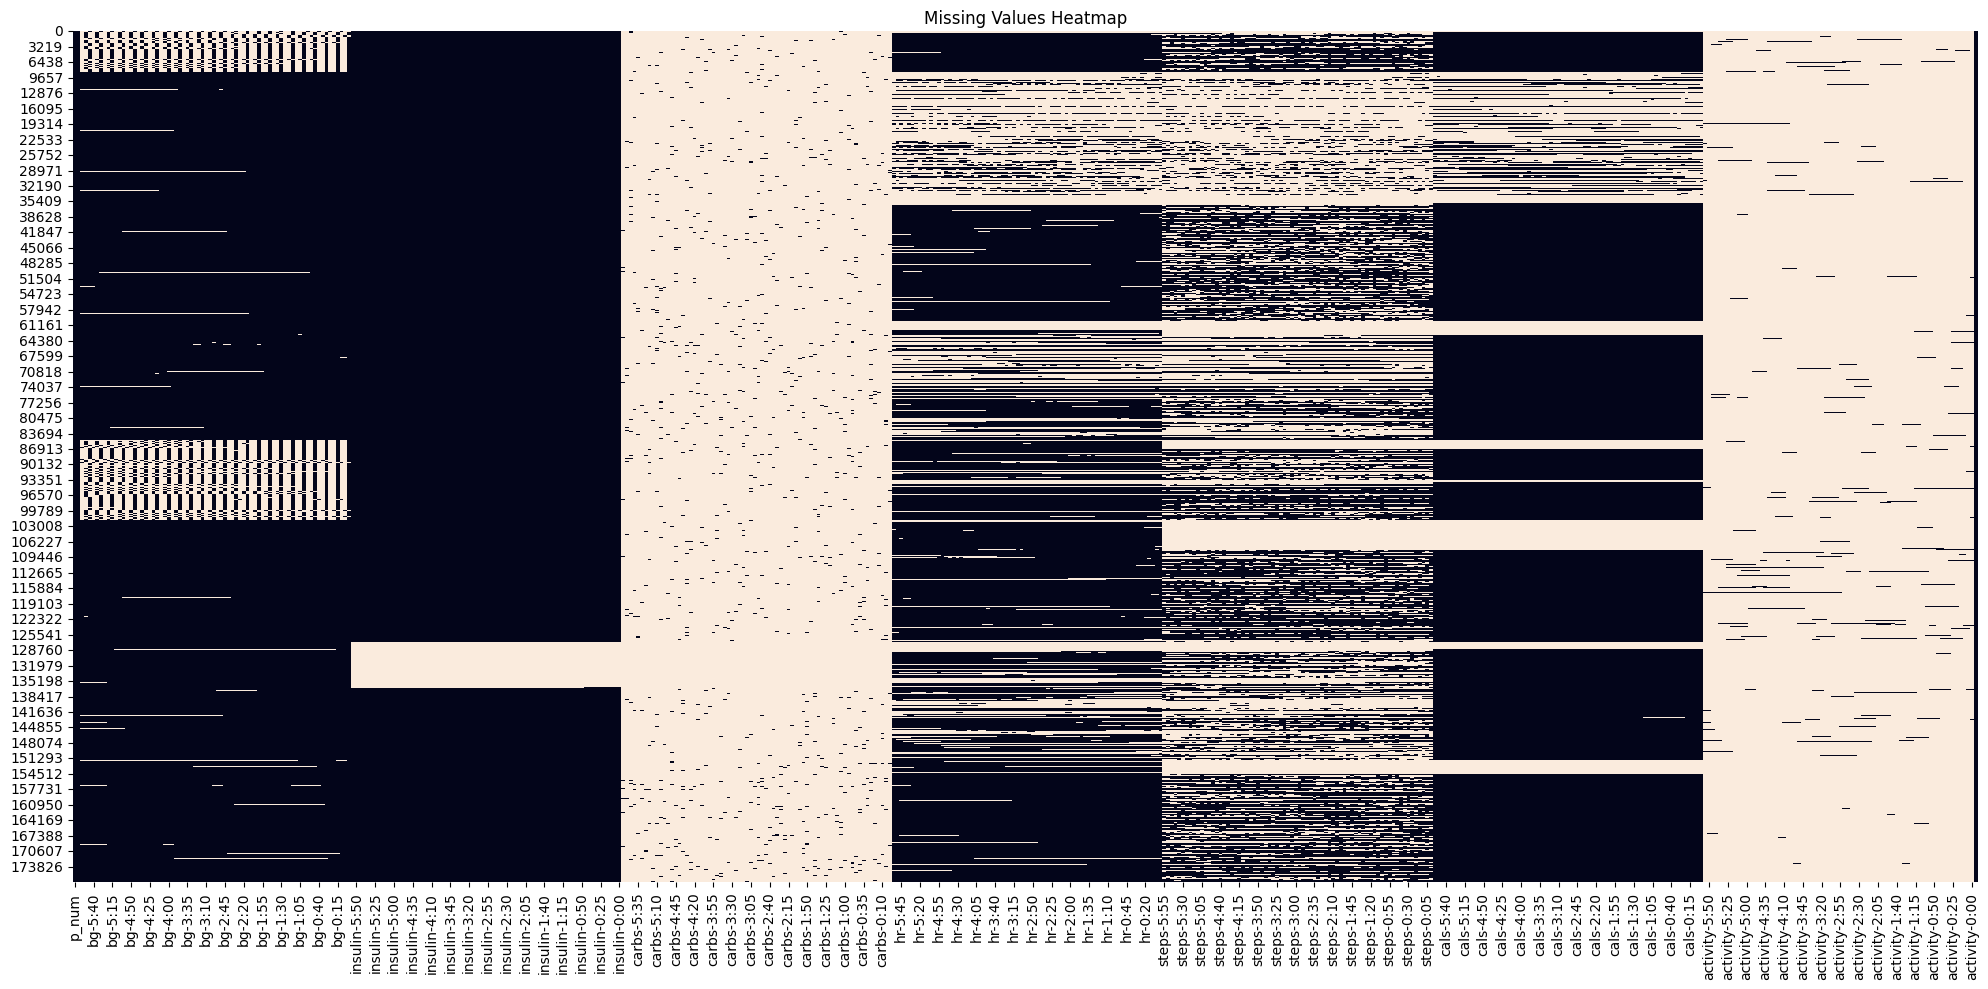

In [12]:
# show the heatmap of missing values
plt.figure(figsize=(20, 10))
sns.heatmap(train_data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [49]:
categorical_cols = train_data.select_dtypes(include=['object', 'category']).columns.drop('time')

label_encoder = LabelEncoder()

# Apply Label Encoding for later correlation
for column in categorical_cols:
    combined_values = pd.concat([train_data[column].astype(str), test_data[column].astype(str)], axis=0)
    label_encoder.fit(combined_values)
    train_data[column] = label_encoder.transform(train_data[column].astype(str))
    test_data[column] = label_encoder.transform(test_data[column].astype(str))

high_missing_cols = train_missing_percent[train_missing_percent > 60].index.tolist()

correlation_cols = train_data[high_missing_cols + ['bg+1:00']]
correlation_cols = correlation_cols.fillna(correlation_cols.mean())
correlation_matrix = correlation_cols.corr()
blood_glucose_correlations = correlation_matrix['bg+1:00'].drop('bg+1:00')

sorted_correlations = blood_glucose_correlations.abs().sort_values(ascending=False)
print(sorted_correlations.head(10))

Series([], Name: bg+1:00, dtype: float64)


In [14]:
print(train_data.head())

   p_num      time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  bg-5:30  \
0      0  06:10:00      NaN      NaN      9.6      NaN      NaN      9.7   
1      0  06:25:00      NaN      NaN      9.7      NaN      NaN      9.2   
2      0  06:40:00      NaN      NaN      9.2      NaN      NaN      8.7   
3      0  06:55:00      NaN      NaN      8.7      NaN      NaN      8.4   
4      0  07:10:00      NaN      NaN      8.4      NaN      NaN      8.1   

   bg-5:25  bg-5:20  ...  activity-0:40  activity-0:35  activity-0:30  \
0      NaN      NaN  ...             21             21             21   
1      NaN      NaN  ...             21             21             21   
2      NaN      NaN  ...             21             21             21   
3      NaN      NaN  ...             21             21             21   
4      NaN      NaN  ...             21             21             21   

   activity-0:25  activity-0:20  activity-0:15  activity-0:10  activity-0:05  \
0             21        

In [15]:
train_data.head()

p_num      time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  bg-5:30  \
0      0  06:10:00      NaN      NaN      9.6      NaN      NaN      9.7   
1      0  06:25:00      NaN      NaN      9.7      NaN      NaN      9.2   
2      0  06:40:00      NaN      NaN      9.2      NaN      NaN      8.7   
3      0  06:55:00      NaN      NaN      8.7      NaN      NaN      8.4   
4      0  07:10:00      NaN      NaN      8.4      NaN      NaN      8.1   

   bg-5:25  bg-5:20  ...  activity-0:40  activity-0:35  activity-0:30  \
0      NaN      NaN  ...             21             21             21   
1      NaN      NaN  ...             21             21             21   
2      NaN      NaN  ...             21             21             21   
3      NaN      NaN  ...             21             21             21   
4      NaN      NaN  ...             21             21             21   

   activity-0:25  activity-0:20  activity-0:15  activity-0:10  activity-0:05  \
0             21             22             22             22             22   
1             21             22             22             22             22   
2             21             22             22             22             22   
3             21             22             22             22             22   
4             21             22             22             22             22   

   activity-0:00  bg+1:00  
0             23     13.4  
1             23     12.8  
2             23     15.5  
3             23     14.8  
4             23     12.7  

[5 rows x 507 columns]

In [17]:
test_data.head()

p_num      time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  bg-5:30  \
0      0  06:45:00      NaN      9.2      NaN      NaN     10.2      NaN   
1      0  11:25:00      NaN      NaN      9.9      NaN      NaN      9.4   
2      0  14:45:00      NaN      5.5      NaN      NaN      5.5      NaN   
3      0  04:30:00      NaN      3.4      NaN      NaN      3.9      NaN   
4      0  04:20:00      NaN      NaN      8.3      NaN      NaN     10.0   

   bg-5:25  bg-5:20  ...  activity-0:45  activity-0:40  activity-0:35  \
0      NaN     10.3  ...             21             21             21   
1      NaN      NaN  ...             21             21             21   
2      NaN      5.2  ...             21             21             21   
3      NaN      4.7  ...             21             21             21   
4      NaN      NaN  ...             21             21             21   

   activity-0:30  activity-0:25  activity-0:20  activity-0:15  activity-0:10  \
0             21             21             22             22             22   
1             21             21             22             22             16   
2             21             21             22             22             22   
3             21             21             22             22             22   
4             21             21             22             22             22   

   activity-0:05  activity-0:00  
0             22             23  
1             16             17  
2             22             23  
3             22             23  
4             22             23  

[5 rows x 506 columns]

In [50]:
train_data = train_data.drop(columns=high_missing_cols)
test_data = test_data.drop(columns=high_missing_cols)

cols_to_impute = train_missing_percent[(train_missing_percent > 0) & (train_missing_percent < 40)].index.tolist()

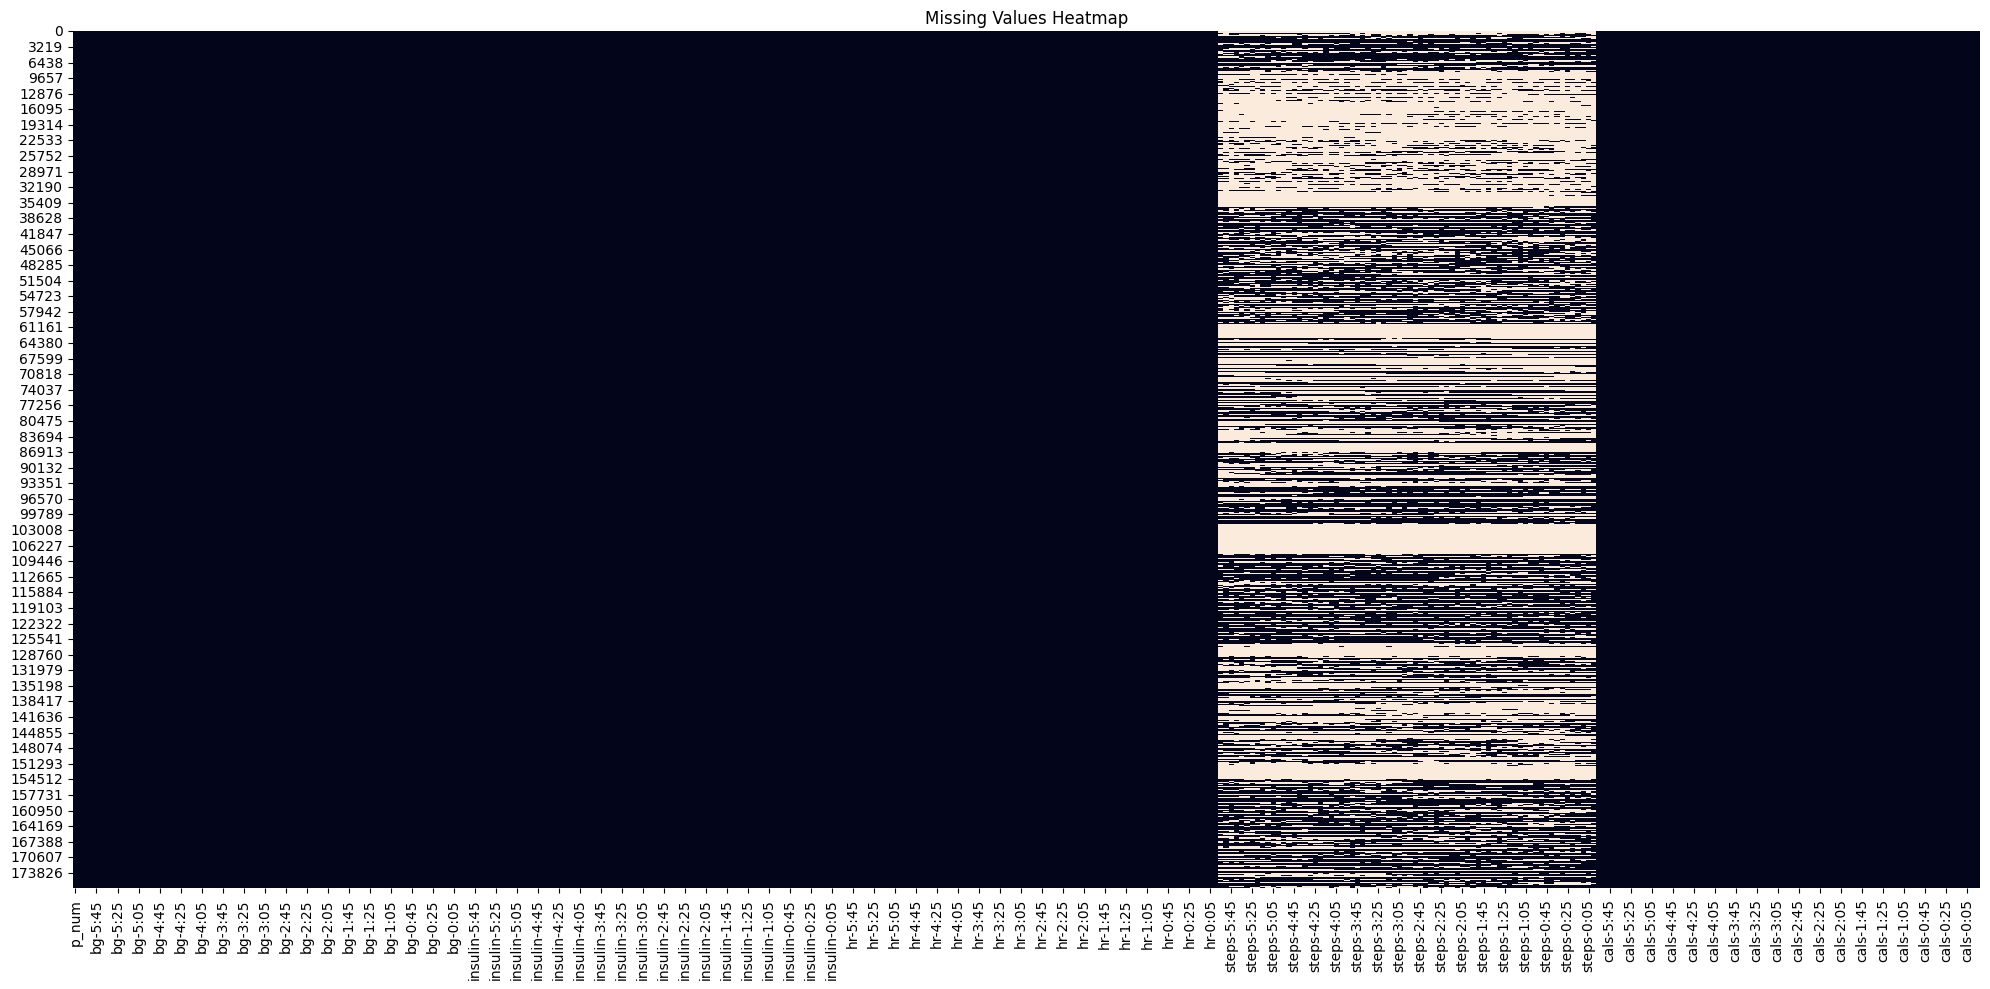

In [51]:
# show the heatmap of missing values after dropping
plt.figure(figsize=(20, 10))
sns.heatmap(train_data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [52]:
# imputation steps
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_to_impute = [col for col in cols_to_impute if col in numeric_cols and col != 'bg+1:00']
categorical_cols = train_data.select_dtypes(include=['object', 'category']).columns
categorical_cols_to_impute = [col for col in cols_to_impute if col in categorical_cols]

if numeric_cols_to_impute:
    numeric_imputer = SimpleImputer(strategy='mean')
    train_data[numeric_cols_to_impute] = numeric_imputer.fit_transform(train_data[numeric_cols_to_impute])
    test_data[numeric_cols_to_impute] = numeric_imputer.transform(test_data[numeric_cols_to_impute])
if categorical_cols_to_impute:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    train_data[categorical_cols_to_impute] = categorical_imputer.fit_transform(train_data[categorical_cols_to_impute])
    test_data[categorical_cols_to_impute] = categorical_imputer.transform(test_data[categorical_cols_to_impute])

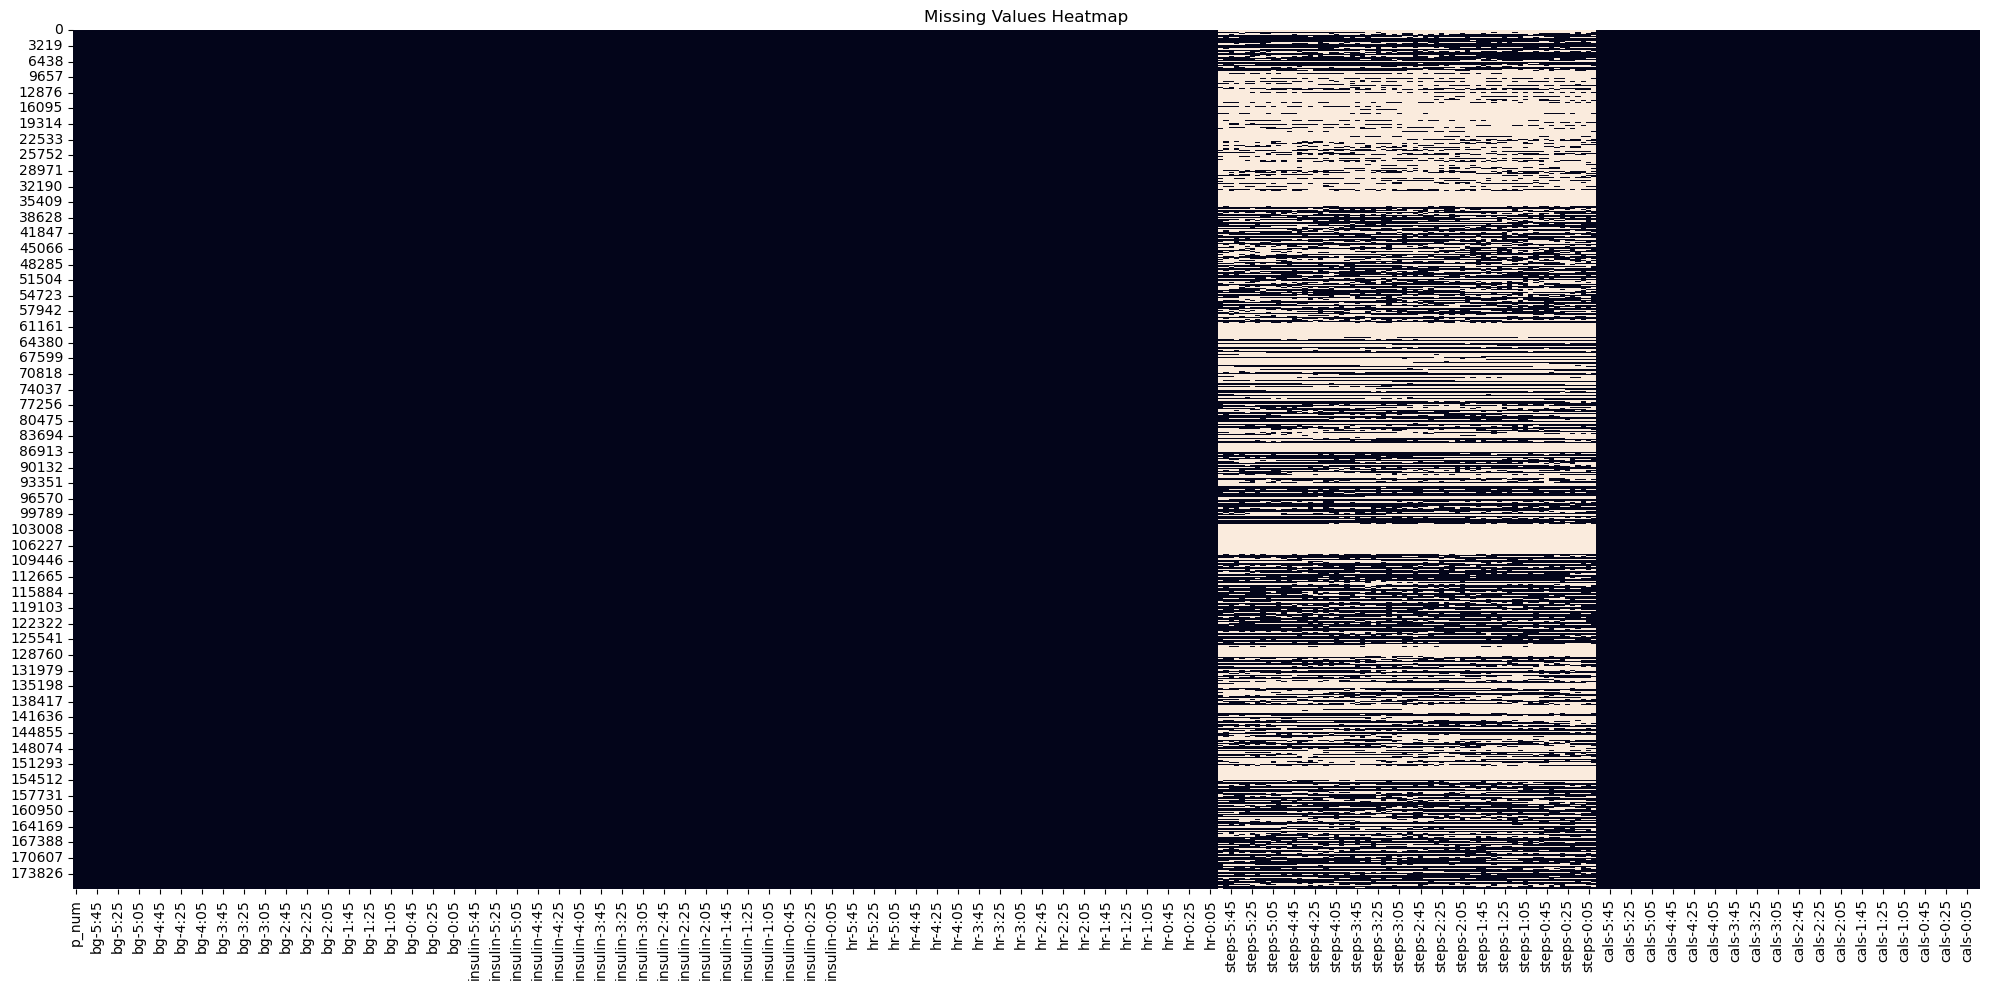

In [ ]:
# show the heatmap of missing values after imputation
plt.figure(figsize=(20, 10))
sns.heatmap(train_data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [13]:
train_data.head()

p_num      time   bg-5:55   bg-5:50  bg-5:45   bg-5:40   bg-5:35  bg-5:30  \
0      0  06:10:00  8.211018  8.230449      9.6  8.210988  8.229649      9.7   
1      0  06:25:00  8.211018  8.230449      9.7  8.210988  8.229649      9.2   
2      0  06:40:00  8.211018  8.230449      9.2  8.210988  8.229649      8.7   
3      0  06:55:00  8.211018  8.230449      8.7  8.210988  8.229649      8.4   
4      0  07:10:00  8.211018  8.230449      8.4  8.210988  8.229649      8.1   

    bg-5:25   bg-5:20  ...  cals-0:40  cals-0:35  cals-0:30  cals-0:25  \
0  8.211049  8.228888  ...   9.364063   9.364096   9.362525   9.366591   
1  8.211049  8.228888  ...   9.364063   9.364096   9.362525   9.366591   
2  8.211049  8.228888  ...   9.364063   9.364096   9.362525   9.366591   
3  8.211049  8.228888  ...   9.364063   9.364096   9.362525   9.366591   
4  8.211049  8.228888  ...   9.364063   9.364096   9.362525   9.366591   

   cals-0:20  cals-0:15  cals-0:10  cals-0:05  cals-0:00  bg+1:00  
0   9.368108   9.366998    9.37001   9.372536    9.36896     13.4  
1   9.368108   9.366998    9.37001   9.372536    9.36896     12.8  
2   9.368108   9.366998    9.37001   9.372536    9.36896     15.5  
3   9.368108   9.366998    9.37001   9.372536    9.36896     14.8  
4   9.368108   9.366998    9.37001   9.372536    9.36896     12.7  

[5 rows x 363 columns]

In [14]:
test_data.head()

p_num      time   bg-5:55   bg-5:50   bg-5:45   bg-5:40    bg-5:35  \
0      0  06:45:00  8.211018  9.200000  8.253291  8.210988  10.200000   
1      0  11:25:00  8.211018  8.230449  9.900000  8.210988   8.229649   
2      0  14:45:00  8.211018  5.500000  8.253291  8.210988   5.500000   
3      0  04:30:00  8.211018  3.400000  8.253291  8.210988   3.900000   
4      0  04:20:00  8.211018  8.230449  8.300000  8.210988   8.229649   

     bg-5:30   bg-5:25    bg-5:20  ...  cals-0:45  cals-0:40  cals-0:35  \
0   8.254083  8.211049  10.300000  ...       4.90       4.90       4.90   
1   9.400000  8.211049   8.228888  ...      12.19       5.87       9.70   
2   8.254083  8.211049   5.200000  ...      19.20      17.65       9.98   
3   8.254083  8.211049   4.700000  ...       4.80       4.80       4.80   
4  10.000000  8.211049   8.228888  ...      10.28       4.80       4.80   

   cals-0:30  cals-0:25  cals-0:20  cals-0:15  cals-0:10  cals-0:05  cals-0:00  
0       4.80       4.80       4.80       4.80       4.80       4.90       6.06  
1      13.92      16.22      16.69      23.12      30.51      24.57      32.43  
2      25.24      12.27       6.83       6.53       7.97      19.76      10.16  
3       5.00       4.90       4.90       4.80       4.80       4.90       4.80  
4       4.80       4.90       4.80       4.80       4.80       4.80       4.80  

[5 rows x 362 columns]

In [15]:
train_data.describe()


p_num        bg-5:55        bg-5:50        bg-5:45  \
count  177024.000000  177024.000000  177024.000000  177024.000000   
mean        4.259615       8.211018       8.230449       8.253291   
std         2.626331       2.623458       2.757081       2.829664   
min         0.000000       2.200000       2.200000       2.200000   
25%         2.000000       6.400000       6.300000       6.200000   
50%         4.000000       8.211018       8.000000       7.900000   
75%         7.000000       9.300000       9.500000       9.600000   
max         8.000000      22.200000      25.100000      27.800000   

             bg-5:40        bg-5:35        bg-5:30        bg-5:25  \
count  177024.000000  177024.000000  177024.000000  177024.000000   
mean        8.210988       8.229649       8.254083       8.211049   
std         2.623334       2.752644       2.835156       2.623420   
min         2.200000       2.200000       2.200000       2.200000   
25%         6.400000       6.300000       6.200000       6.400000   
50%         8.210988       8.000000       7.900000       8.211049   
75%         9.300000       9.500000       9.600000       9.300000   
max        22.200000      25.100000      27.800000      22.200000   

             bg-5:20        bg-5:15  ...      cals-0:40      cals-0:35  \
count  177024.000000  177024.000000  ...  177024.000000  177024.000000   
mean        8.228888       8.254602  ...       9.364063       9.364096   
std         2.748301       2.840614  ...       7.168274       7.168951   
min         2.200000       2.200000  ...       0.030000       0.030000   
25%         6.300000       6.200000  ...       5.850000       5.850000   
50%         8.000000       7.900000  ...       6.930000       6.930000   
75%         9.500000       9.600000  ...       9.364063       9.364096   
max        25.100000      27.800000  ...     116.100000     116.100000   

           cals-0:30      cals-0:25      cals-0:20      cals-0:15  \
count  177024.000000  177024.000000  177024.000000  177024.000000   
mean        9.362525       9.366591       9.368108       9.366998   
std         7.173446       7.174531       7.174680       7.179775   
min         0.030000       0.030000       0.030000       0.030000   
25%         5.850000       5.850000       5.850000       5.850000   
50%         6.930000       6.930000       6.930000       6.930000   
75%         9.362525       9.366591       9.368108       9.366998   
max       116.100000     116.100000     116.100000     116.100000   

           cals-0:10      cals-0:05      cals-0:00        bg+1:00  
count  177024.000000  177024.000000  177024.000000  177024.000000  
mean        9.370010       9.372536       9.368960       8.277045  
std         7.178427       7.179827       7.180021       2.996398  
min         0.030000       0.030000       0.030000       2.200000  
25%         5.850000       5.850000       5.850000       6.100000  
50%         6.930000       6.930000       6.930000       7.700000  
75%         9.370010       9.372536       9.368960       9.900000  
max       116.100000     116.100000     116.100000      27.800000  

[8 rows x 362 columns]

In [53]:
print(f"train data shape: {train_data.shape}")
print(f"test data shape: {test_data.shape}")

train data shape: (177024, 363)
test data shape: (3644, 506)


# Train data visualization

In [17]:
time_range = train_data['time'].unique()
time_as_timedelta = pd.to_timedelta(time_range)
time_range = np.array(time_range)[np.argsort(time_as_timedelta)]

tick_interval = 12 # Display every 12th time tick (1 hour) for readability
num_patients = len(train_data['p_num'].unique())

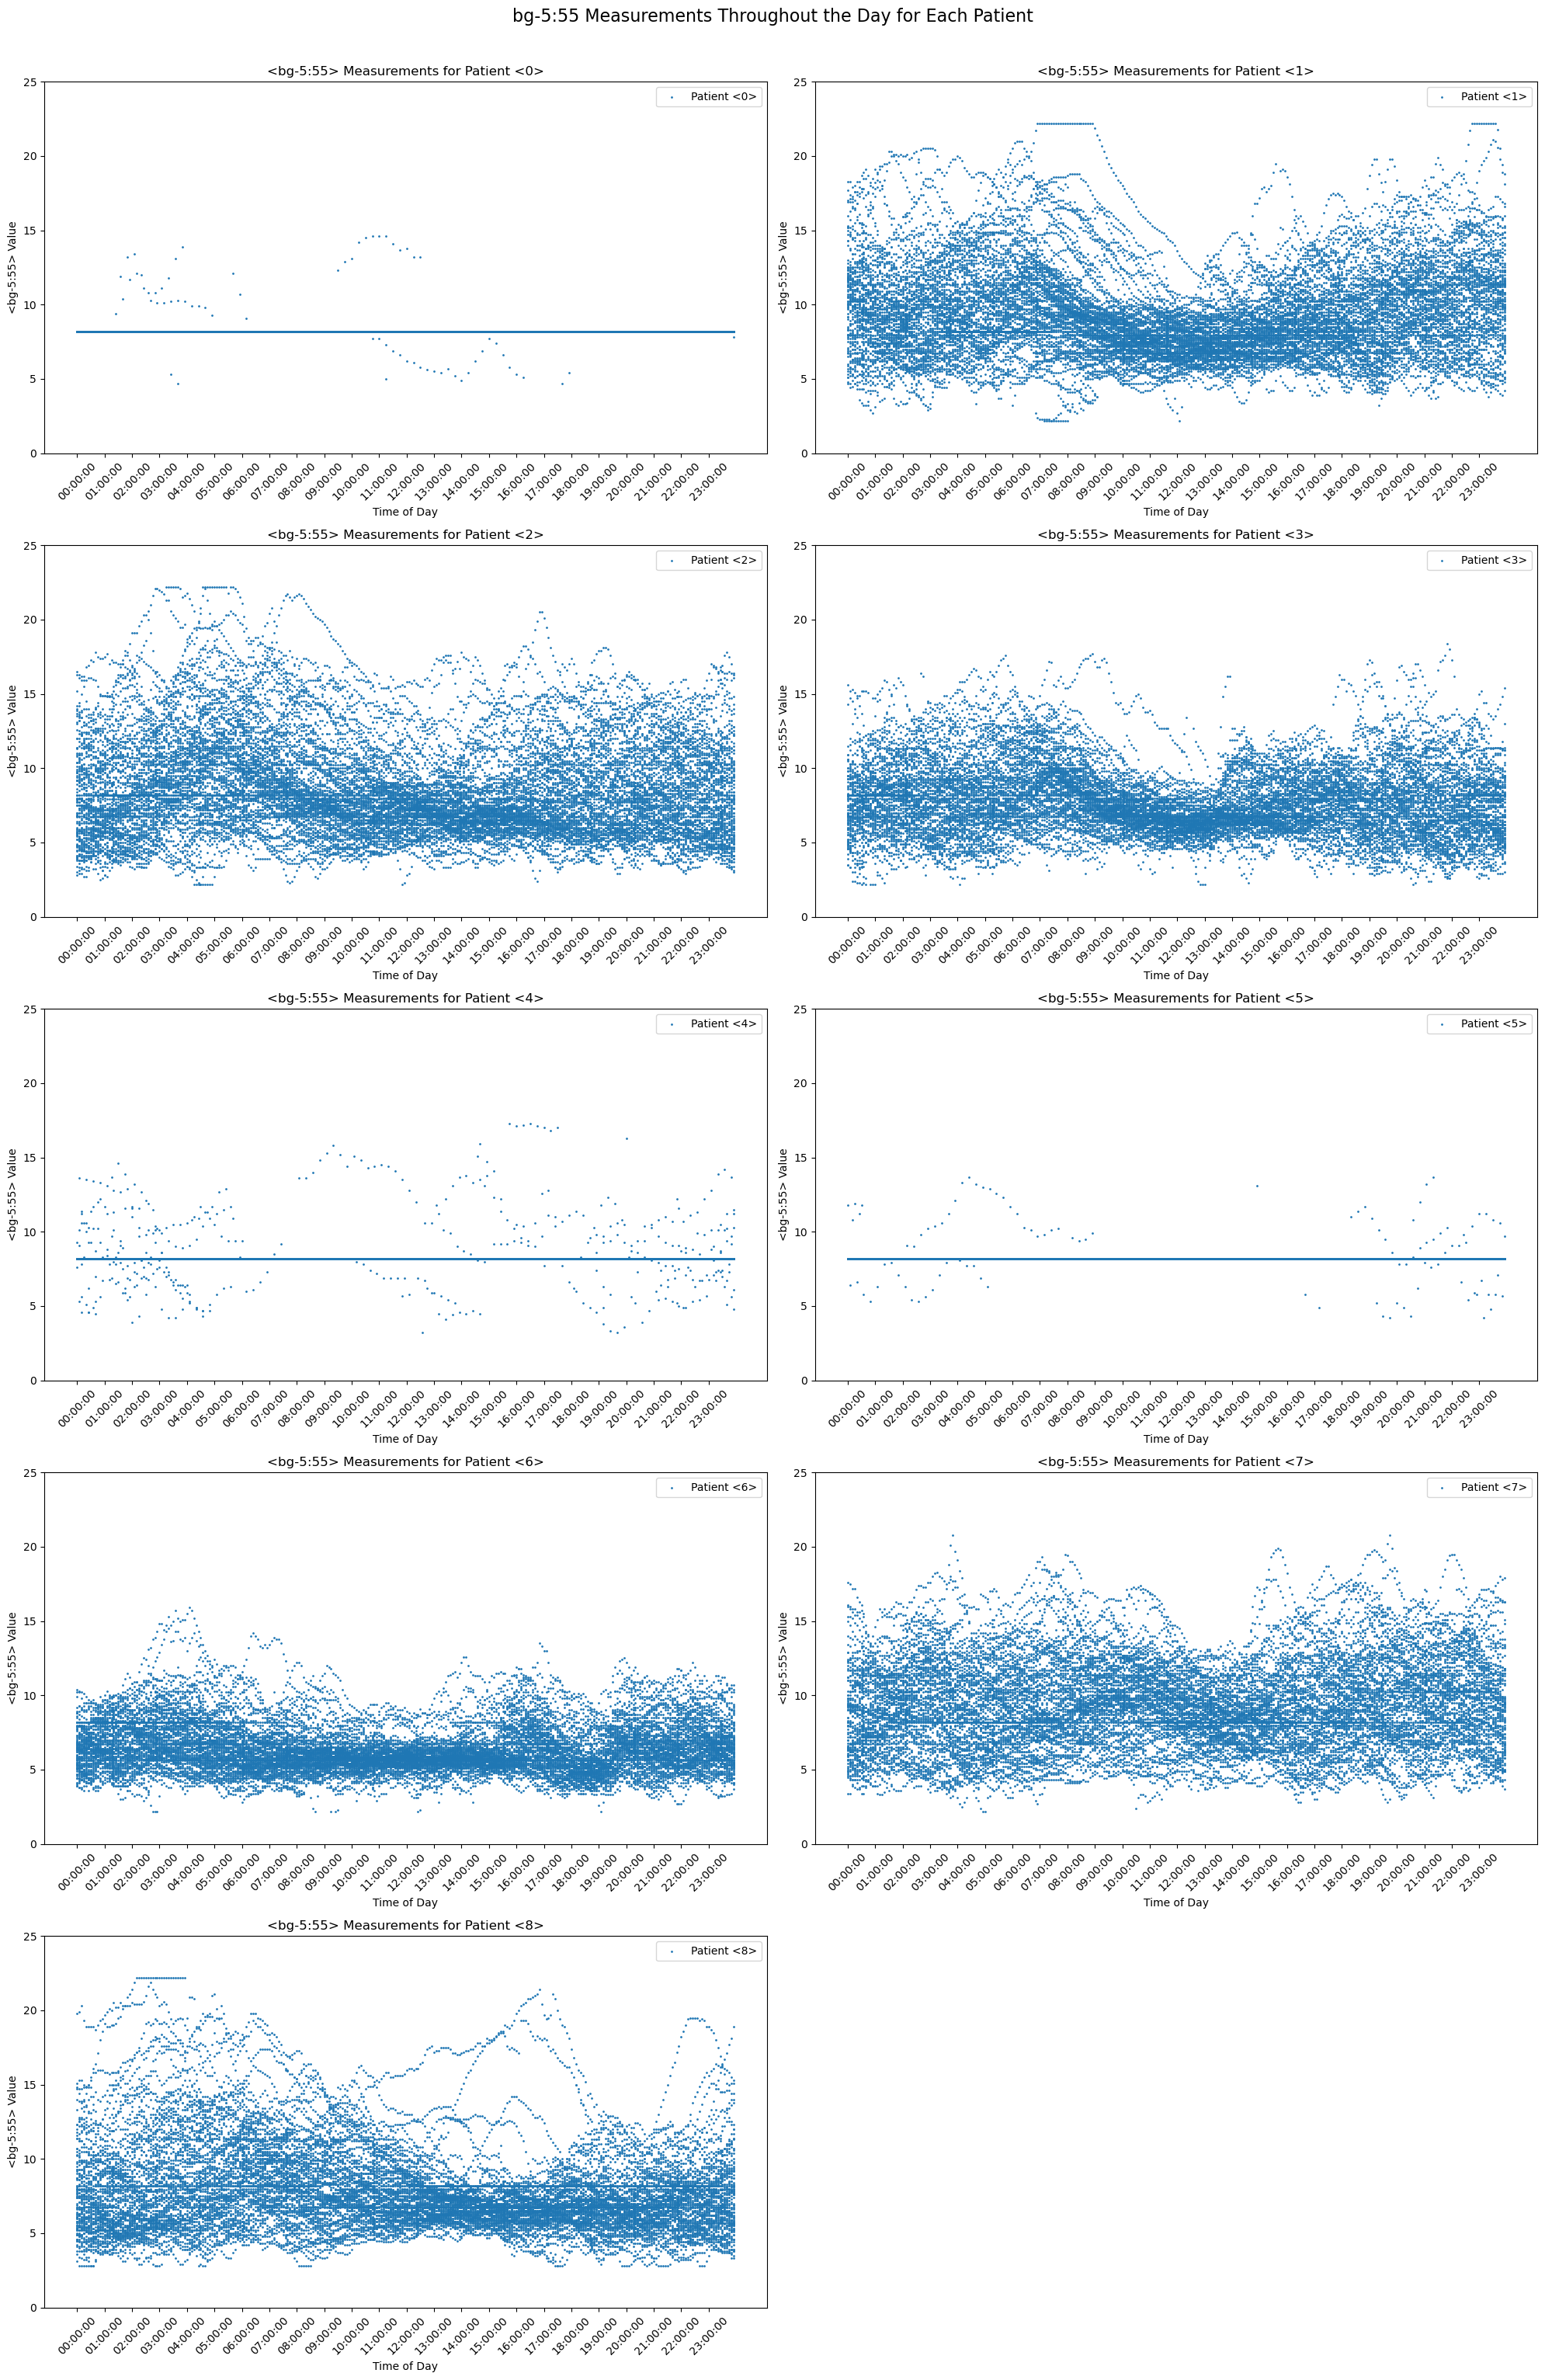

In [ ]:
def plot_variable_scatter(variable_name):
    num_rows = (num_patients + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 6 * num_rows))
    axes = axes.flatten()

    # Loop through each patient and group the data by 'p_num'
    for idx, (patient_id, patient_data) in enumerate(train_data.groupby('p_num', observed=True)):
        ax = axes[idx]

        # Create a list to store data for each time range
        data_on_time = [ [] for _ in range(len(time_range)) ]

        # Loop through the patient data and append the values to the corresponding time slot
        for index, row in patient_data.iterrows():
            # Find the index of the time in the time_range and append the variable's value
            data_on_time[np.where(time_range == row['time'])[0][0]].append(row[variable_name])

        # Create lists for the scatter plot
        X = [time_range[i] for i, data in enumerate(data_on_time) for j in range(len(data))]
        Y = [val for data in data_on_time for val in data]

        # Scatter plot with smaller markers for each patient
        ax.scatter(X, Y, label=f'Patient <{patient_id}>', s=1)

        # Set plot labels and title
        ax.set_xlabel('Time of Day')
        ax.set_ylabel(f'<{variable_name}> Value')
        ax.set_title(f'<{variable_name}> Measurements for Patient <{patient_id}>')
        ax.set_xticks(time_range[::tick_interval])
        ax.tick_params(axis='x', rotation=45)
        ax.set_ylim(0, 25.0)
        ax.legend()

    # If there are any unused subplots (in case of odd number of patients), hide them
    for idx in range(num_patients, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    # Set a global title with the variable_name
    plt.suptitle(f'{variable_name} Measurements Throughout the Day for Each Patient', fontsize=16,  y=1.02)
    plt.show()

plot_variable_scatter('bg-5:55')

In [ ]:
time_slots = [timedelta(minutes=5 * i) for i in range(6 * 12)]

for i, slot in enumerate(time_slots):
    col_name = f'bg-{slot.seconds // 3600}:{(slot.seconds % 3600) // 60:02d}'
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


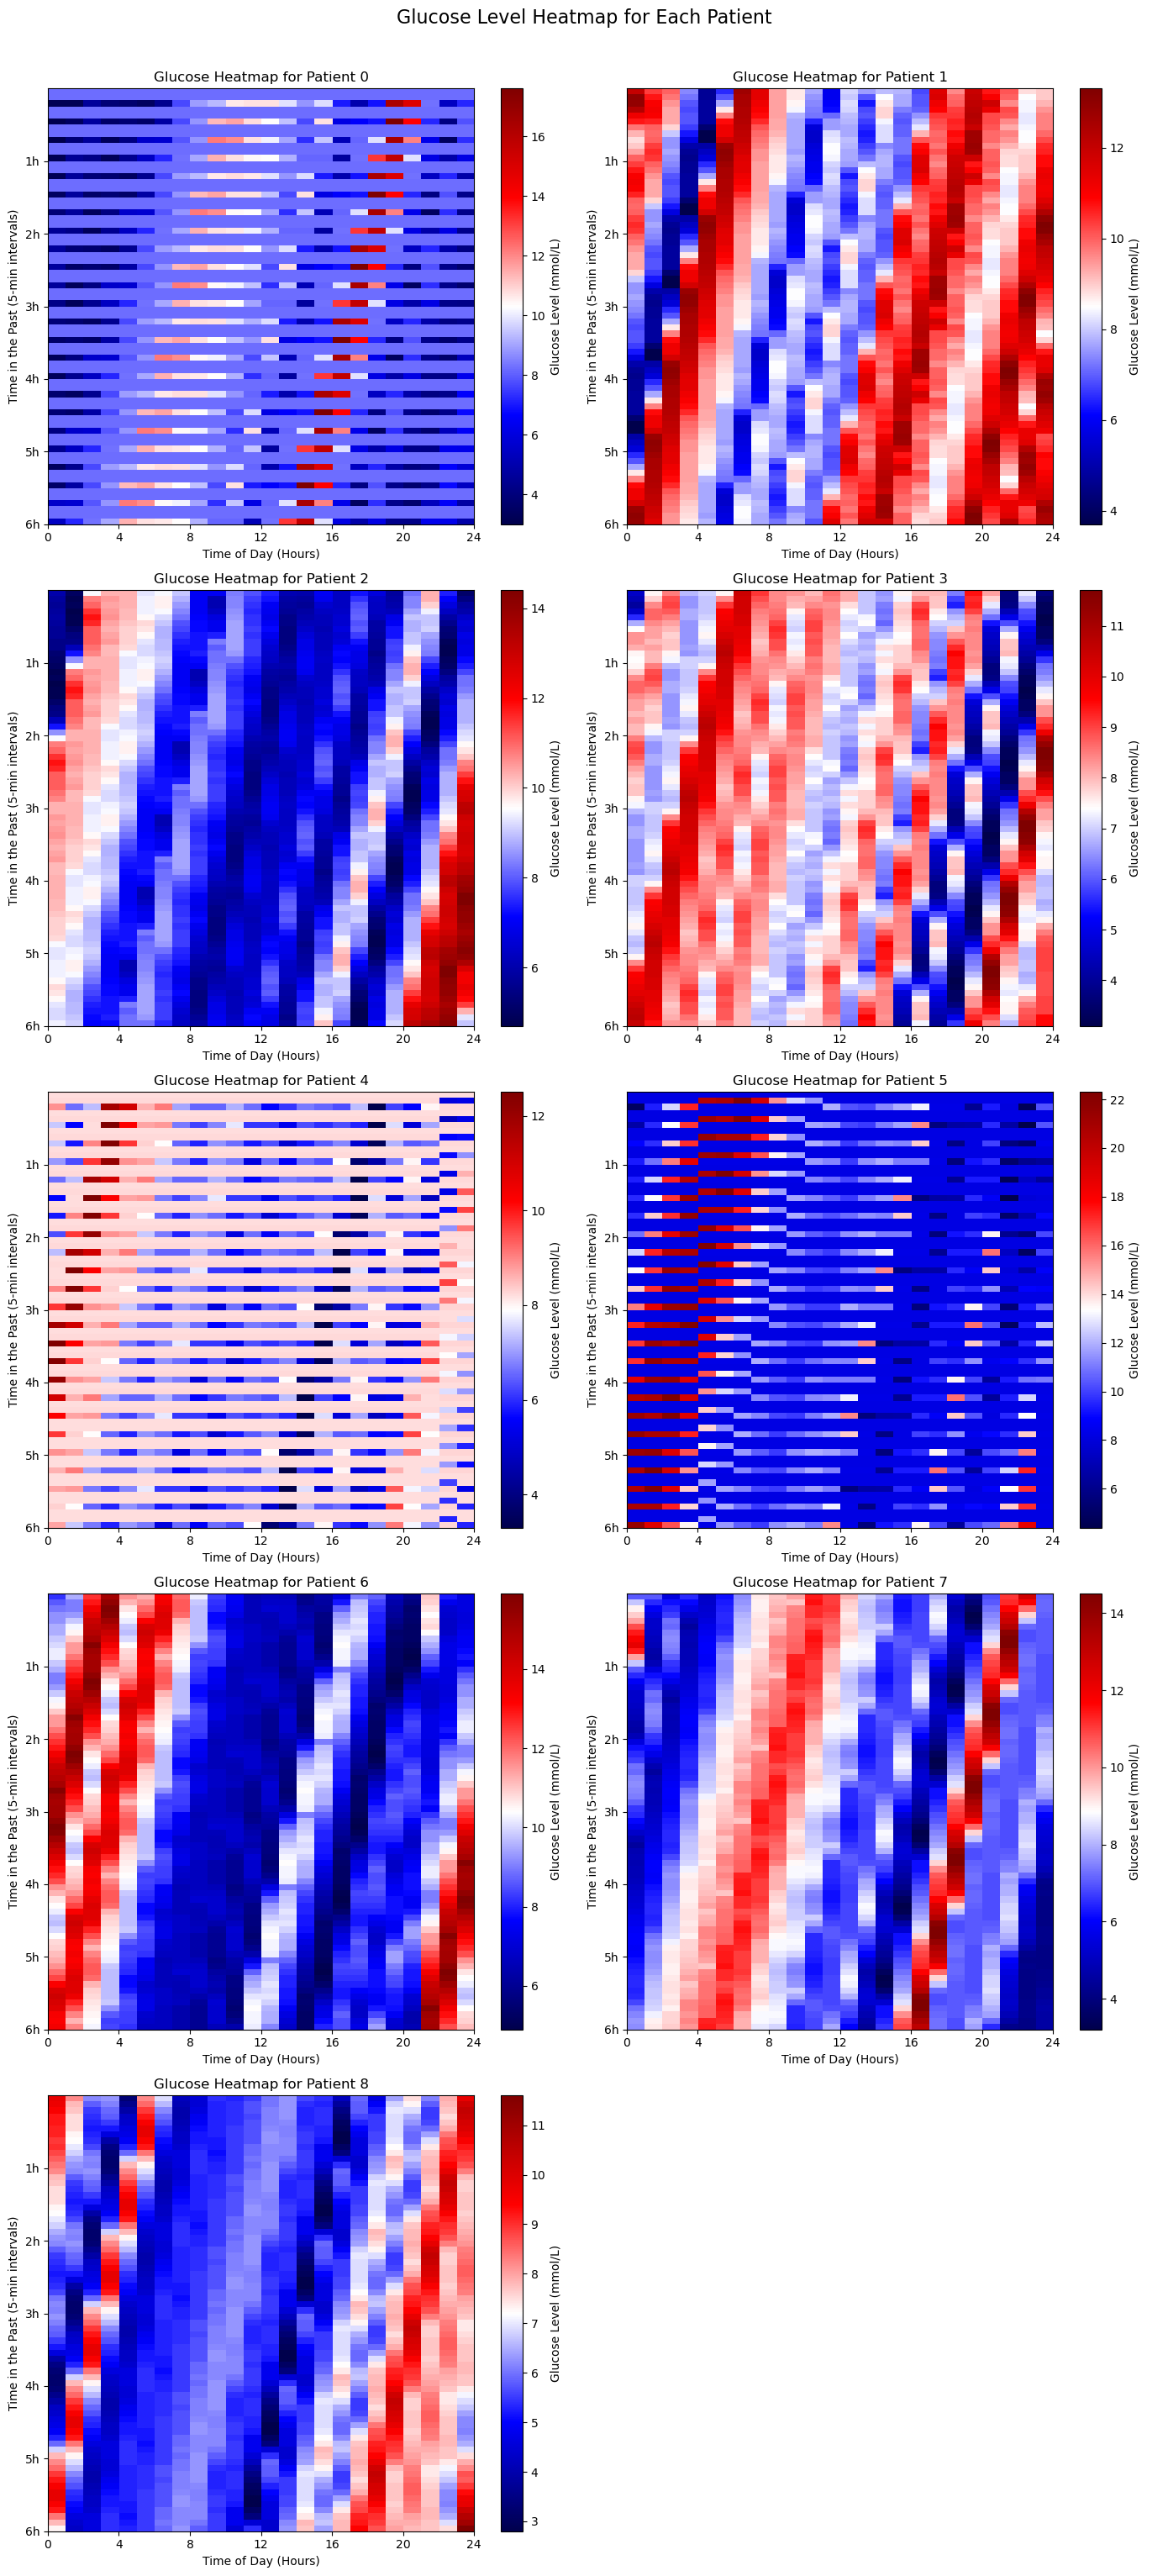

In [ ]:
def plot_variable_heatmap():
    num_rows = (num_patients + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, 6 * num_rows))
    axes = axes.flatten()

    time_slots = [timedelta(minutes=5 * i) for i in range(6 * 12)]  # 5-min intervals for 6 hours

    # Group data by patient
    for idx, (patient_id, patient_data) in enumerate(train_data.groupby('p_num', observed=True)):
        ax = axes[idx]

        # Initialize a 2D array for heatmap data
        heatmap_data = np.full((len(time_slots), 24), np.nan)  # Rows: 5-min intervals, Cols: 24 hours

        # Process each row
        for _, row in patient_data.iterrows():
            current_time = pd.to_timedelta(row['time']).seconds // 3600
            for i, slot in enumerate(time_slots):
                col_name = f'bg-{slot.seconds // 3600}:{(slot.seconds % 3600) // 60:02d}'
                if col_name in row and not pd.isna(row[col_name]):
                    heatmap_data[i, current_time] = row[col_name]

        # Mask invalid values and plot heatmap
        im = ax.imshow(
            heatmap_data,
            aspect='auto',
            cmap='seismic',
            interpolation='nearest',
            origin='lower',
            extent=[0, 24, 0, 6 * 12]  # X: 24 hours, Y: 6 hours in 5-min slots
        )

        # Labels and title
        ax.set_title(f'Glucose Heatmap for Patient {patient_id}')
        ax.set_xlabel('Time of Day (Hours)')
        ax.set_ylabel('Time in the Past (5-min intervals)')
        ax.set_xticks(range(0, 25, 4))  # Tick every 4 hours
        ax.set_yticks(range(0, len(time_slots), 12))  # Tick every 1 hour
        ax.set_yticklabels([f"{6 - i // 12}h" for i in range(0, len(time_slots), 12)])

        # Color bar
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label('Glucose Level (mmol/L)')

    # Hide unused subplots
    for idx in range(num_patients, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.suptitle('Glucose Level Heatmap for Each Patient', fontsize=16, y=1.02)
    plt.show()

plot_variable_heatmap()

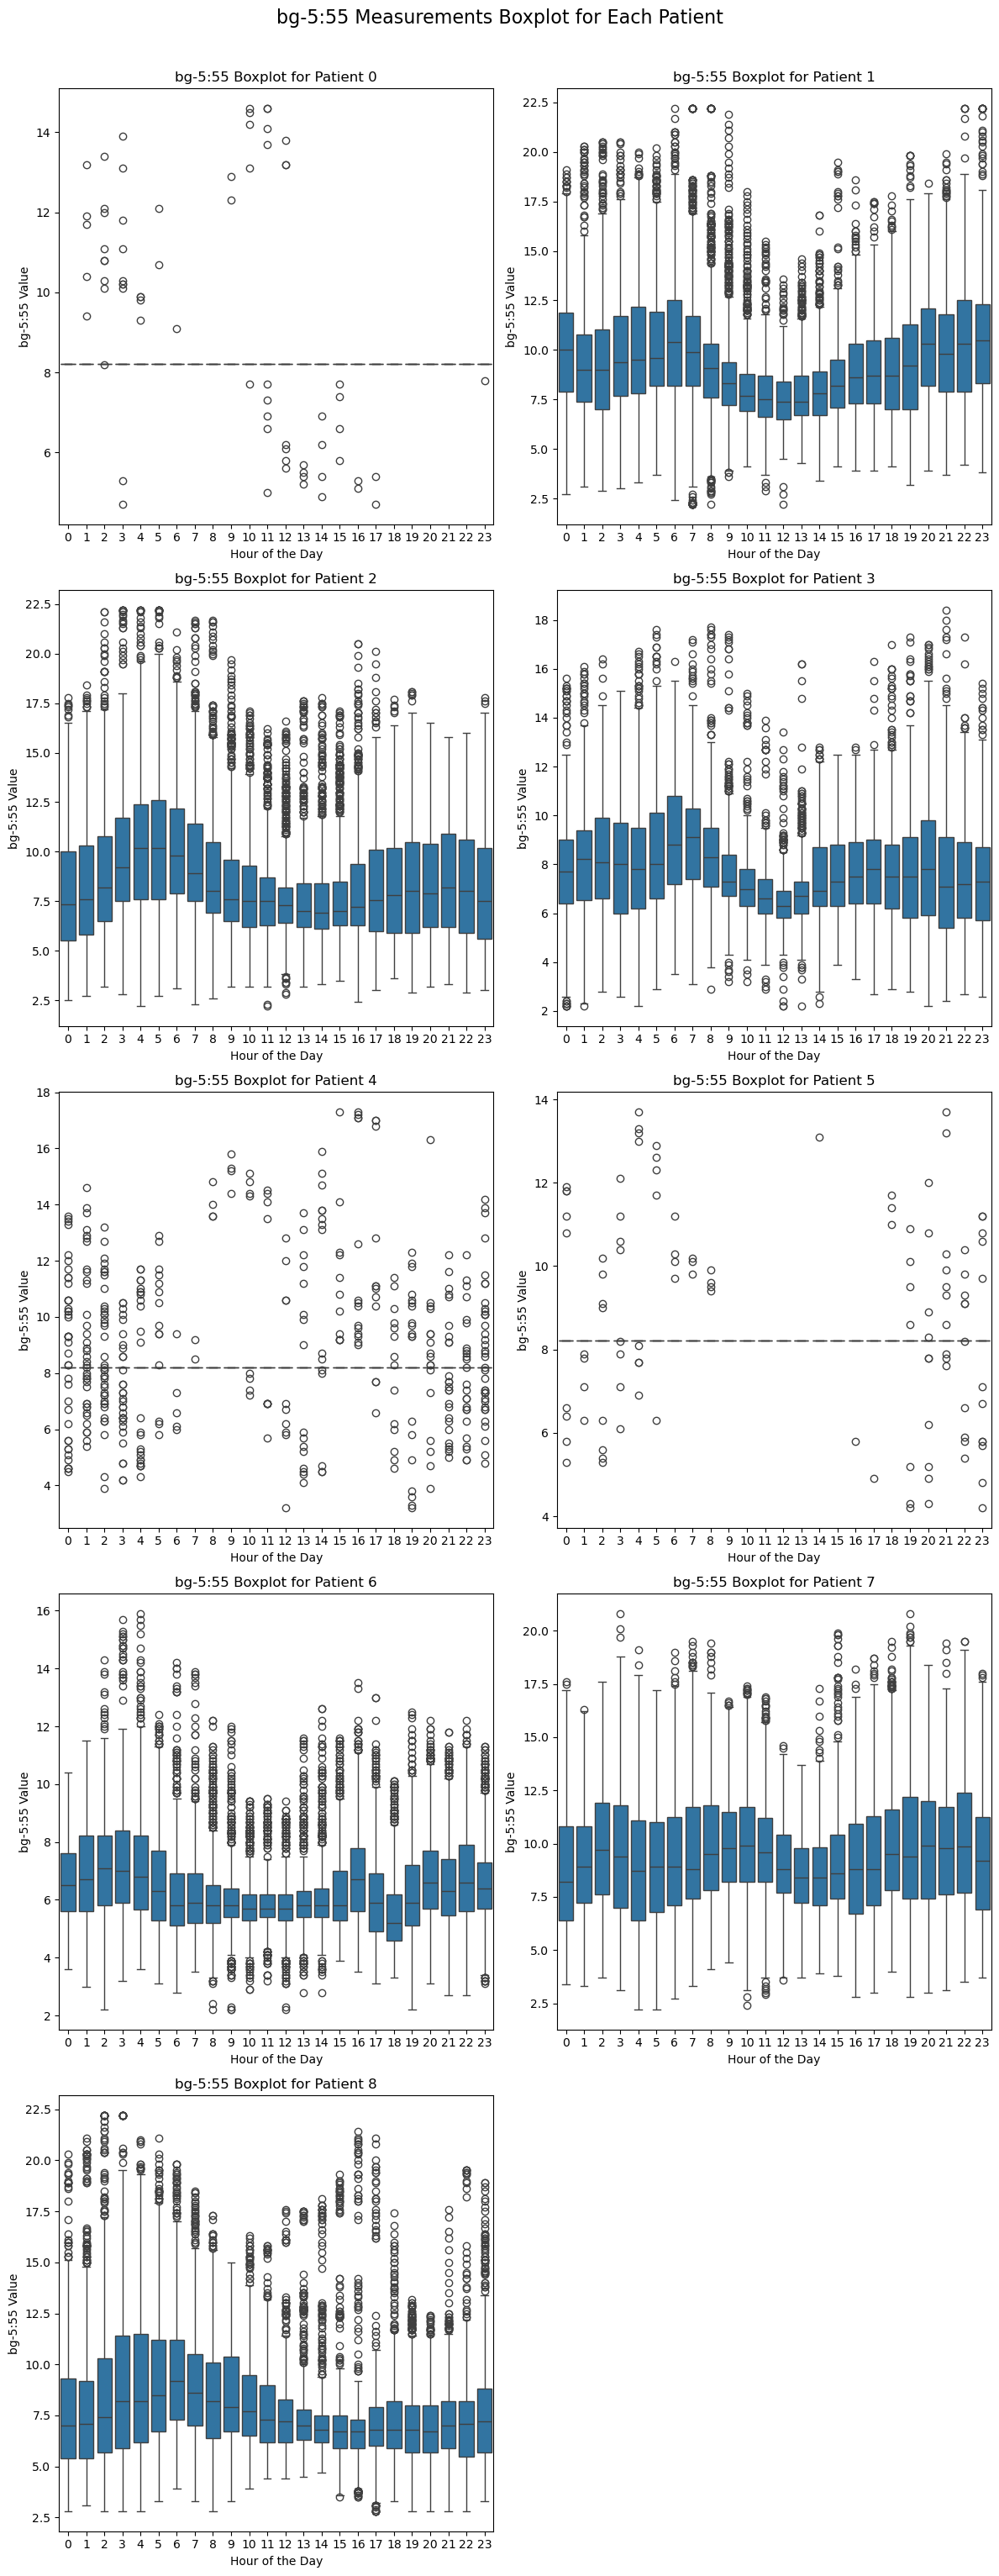

In [ ]:
def plot_variable_boxplot(variable_name):
    num_rows = (num_patients + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    train_data_copy = train_data.copy()

    for idx, (patient_id, patient_data) in enumerate(train_data_copy.groupby('p_num', observed=True)):
        ax = axes[idx]
        patient_data['hour'] = pd.to_datetime(patient_data['time'], format='%H:%M:%S').dt.hour
        sns.boxplot(x='hour', y=variable_name, data=patient_data, ax=ax)
        ax.set_title(f'{variable_name} Boxplot for Patient {patient_id}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel(f'{variable_name} Value')

    for idx in range(num_patients, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.suptitle(f'{variable_name} Measurements Boxplot for Each Patient', fontsize=16, y=1.02)
    plt.show()

plot_variable_boxplot('bg-5:55')

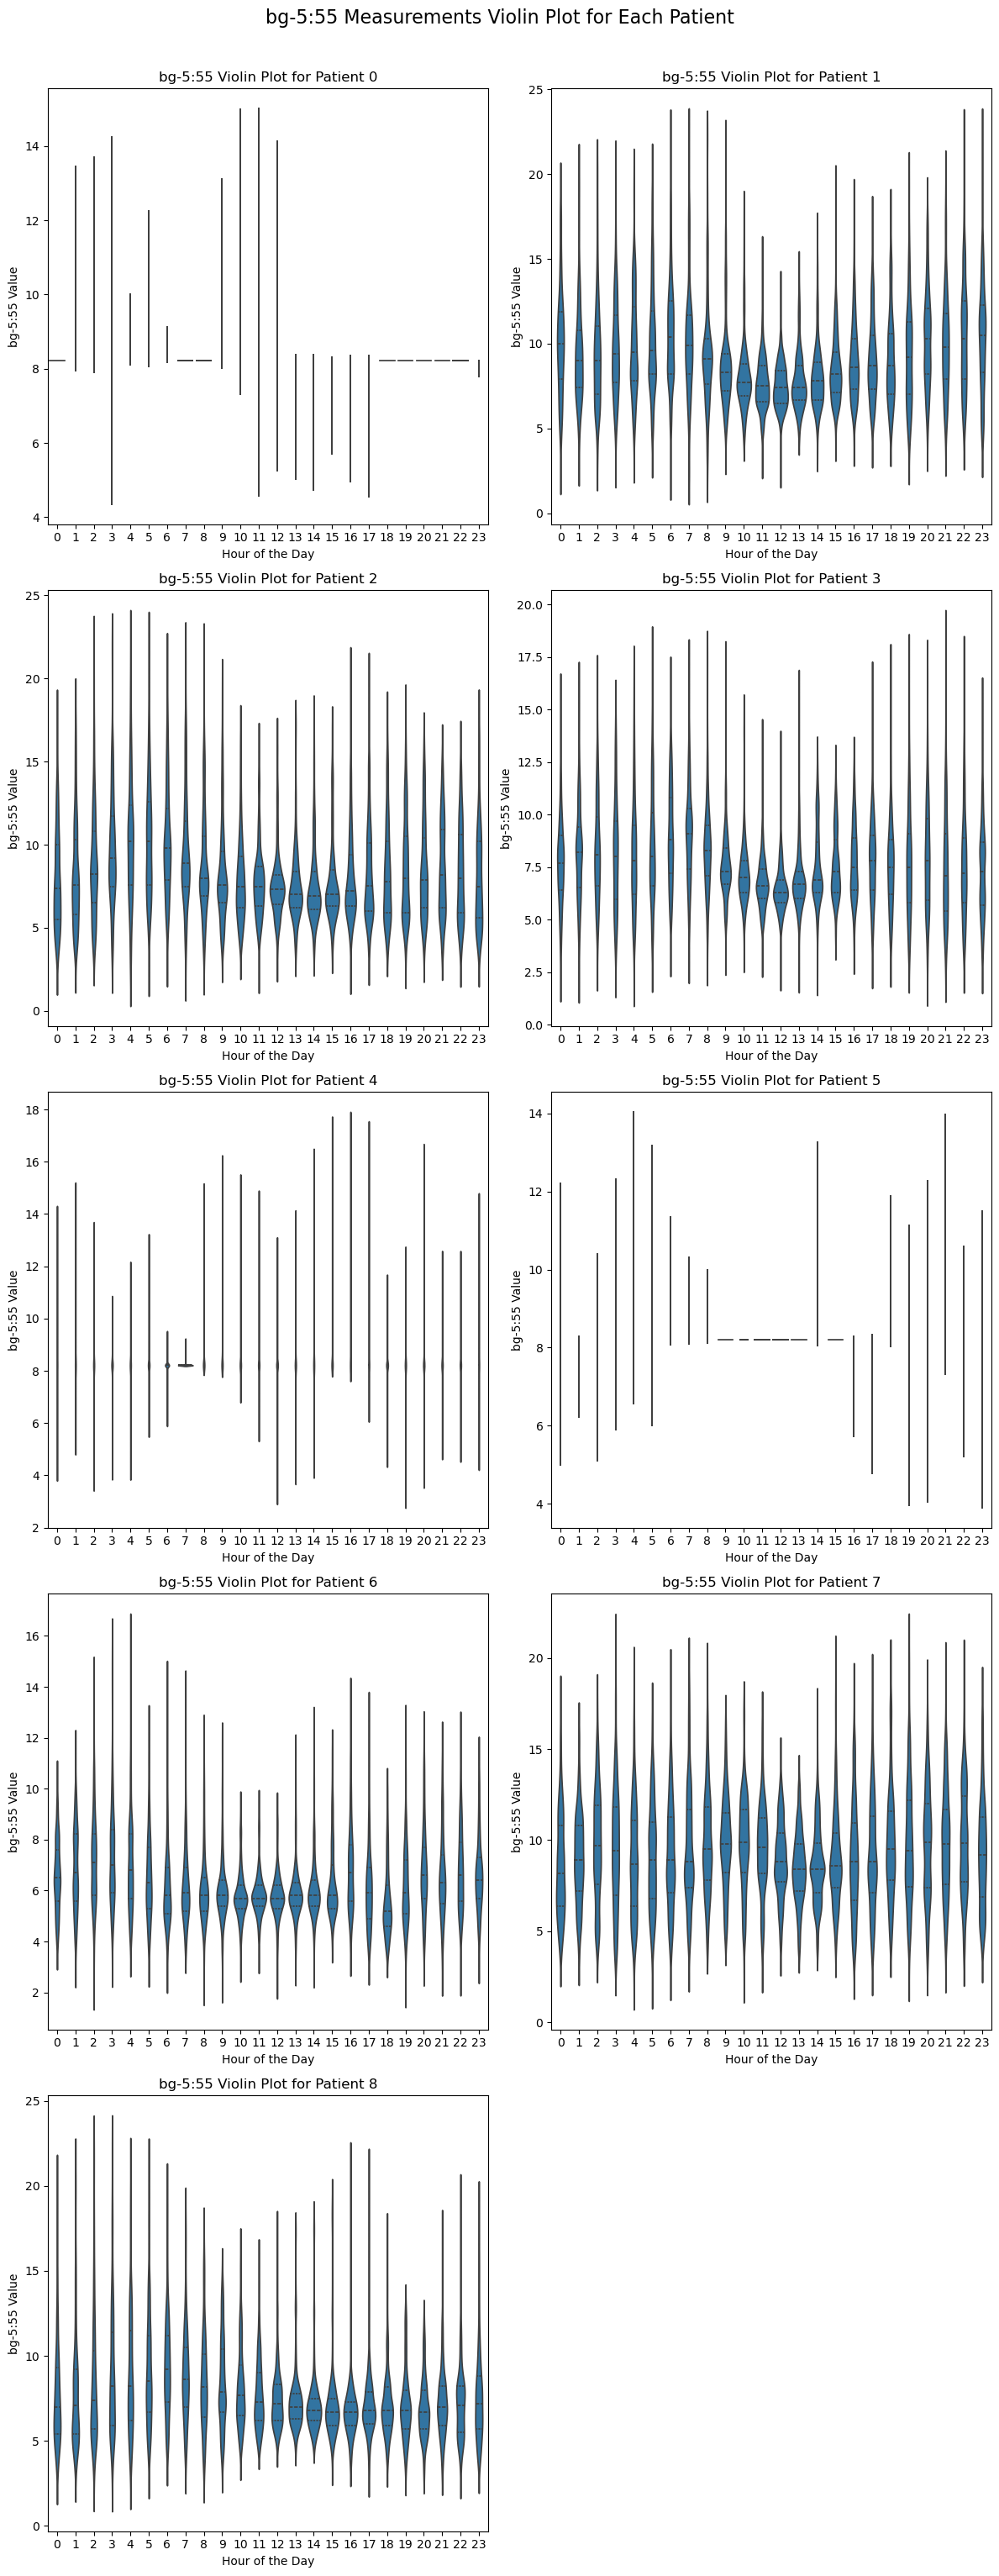

In [ ]:
def plot_variable_violin(variable_name):
    num_rows = (num_patients + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    train_data_copy = train_data.copy()

    for idx, (patient_id, patient_data) in enumerate(train_data_copy.groupby('p_num', observed=True)):
        ax = axes[idx]
        patient_data['hour'] = pd.to_datetime(patient_data['time'], format='%H:%M:%S').dt.hour
        sns.violinplot(x='hour', y=variable_name, data=patient_data, ax=ax, inner="quartile")
        ax.set_title(f'{variable_name} Violin Plot for Patient {patient_id}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel(f'{variable_name} Value')

    for idx in range(num_patients, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.suptitle(f'{variable_name} Measurements Violin Plot for Each Patient', fontsize=16, y=1.02)
    plt.show()

plot_variable_violin('bg-5:55')

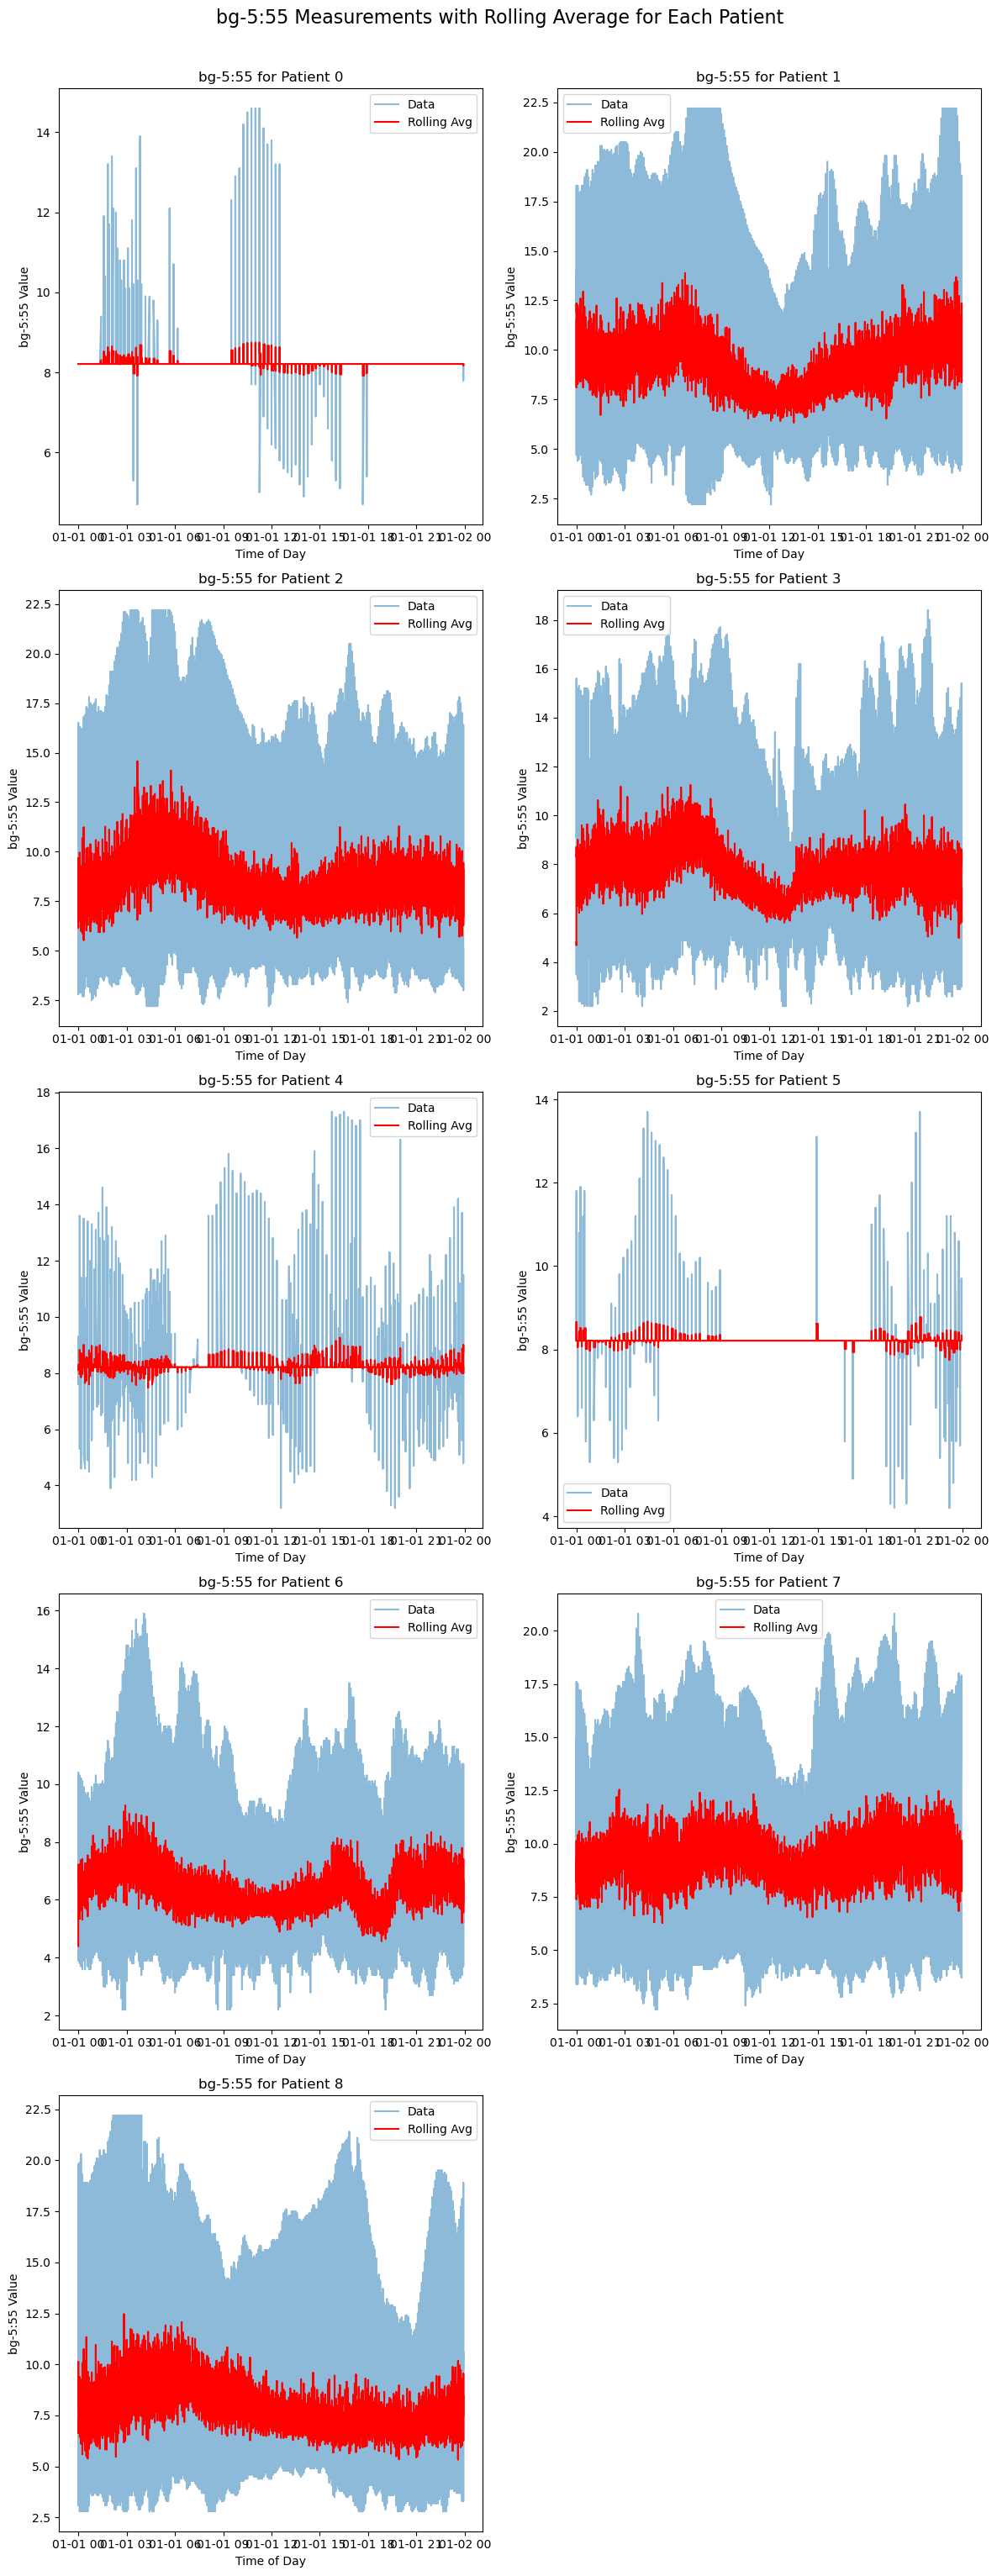

In [ ]:
def plot_variable_line(variable_name, window_size=12):
    num_rows = (num_patients + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    train_data_copy = train_data.copy()

    for idx, (patient_id, patient_data) in enumerate(train_data_copy.groupby('p_num', observed=True)):
        ax = axes[idx]
        patient_data['datetime'] = pd.to_datetime(patient_data['time'], format='%H:%M:%S')
        patient_data = patient_data.set_index('datetime').sort_index()
        rolling_mean = patient_data[variable_name].rolling(window=window_size, min_periods=1).mean()

        ax.plot(patient_data.index, patient_data[variable_name], alpha=0.5, label='Data')
        ax.plot(patient_data.index, rolling_mean, color='red', label='Rolling Avg')
        ax.set_title(f'{variable_name} for Patient {patient_id}')
        ax.set_xlabel('Time of Day')
        ax.set_ylabel(f'{variable_name} Value')
        ax.legend()

    for idx in range(num_patients, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.suptitle(f'{variable_name} Measurements with Rolling Average for Each Patient', fontsize=16, y=1.02)
    plt.show()

plot_variable_line('bg-5:55')

Skipping hour 0 for patient 0: Insufficient variance.
Skipping hour 7 for patient 0: Insufficient variance.
Skipping hour 8 for patient 0: Insufficient variance.
Skipping hour 18 for patient 0: Insufficient variance.
Skipping hour 19 for patient 0: Insufficient variance.
Skipping hour 20 for patient 0: Insufficient variance.
Skipping hour 21 for patient 0: Insufficient variance.
Skipping hour 22 for patient 0: Insufficient variance.
Skipping hour 9 for patient 5: Insufficient variance.
Skipping hour 10 for patient 5: Insufficient variance.
Skipping hour 11 for patient 5: Insufficient variance.
Skipping hour 12 for patient 5: Insufficient variance.
Skipping hour 13 for patient 5: Insufficient variance.
Skipping hour 15 for patient 5: Insufficient variance.


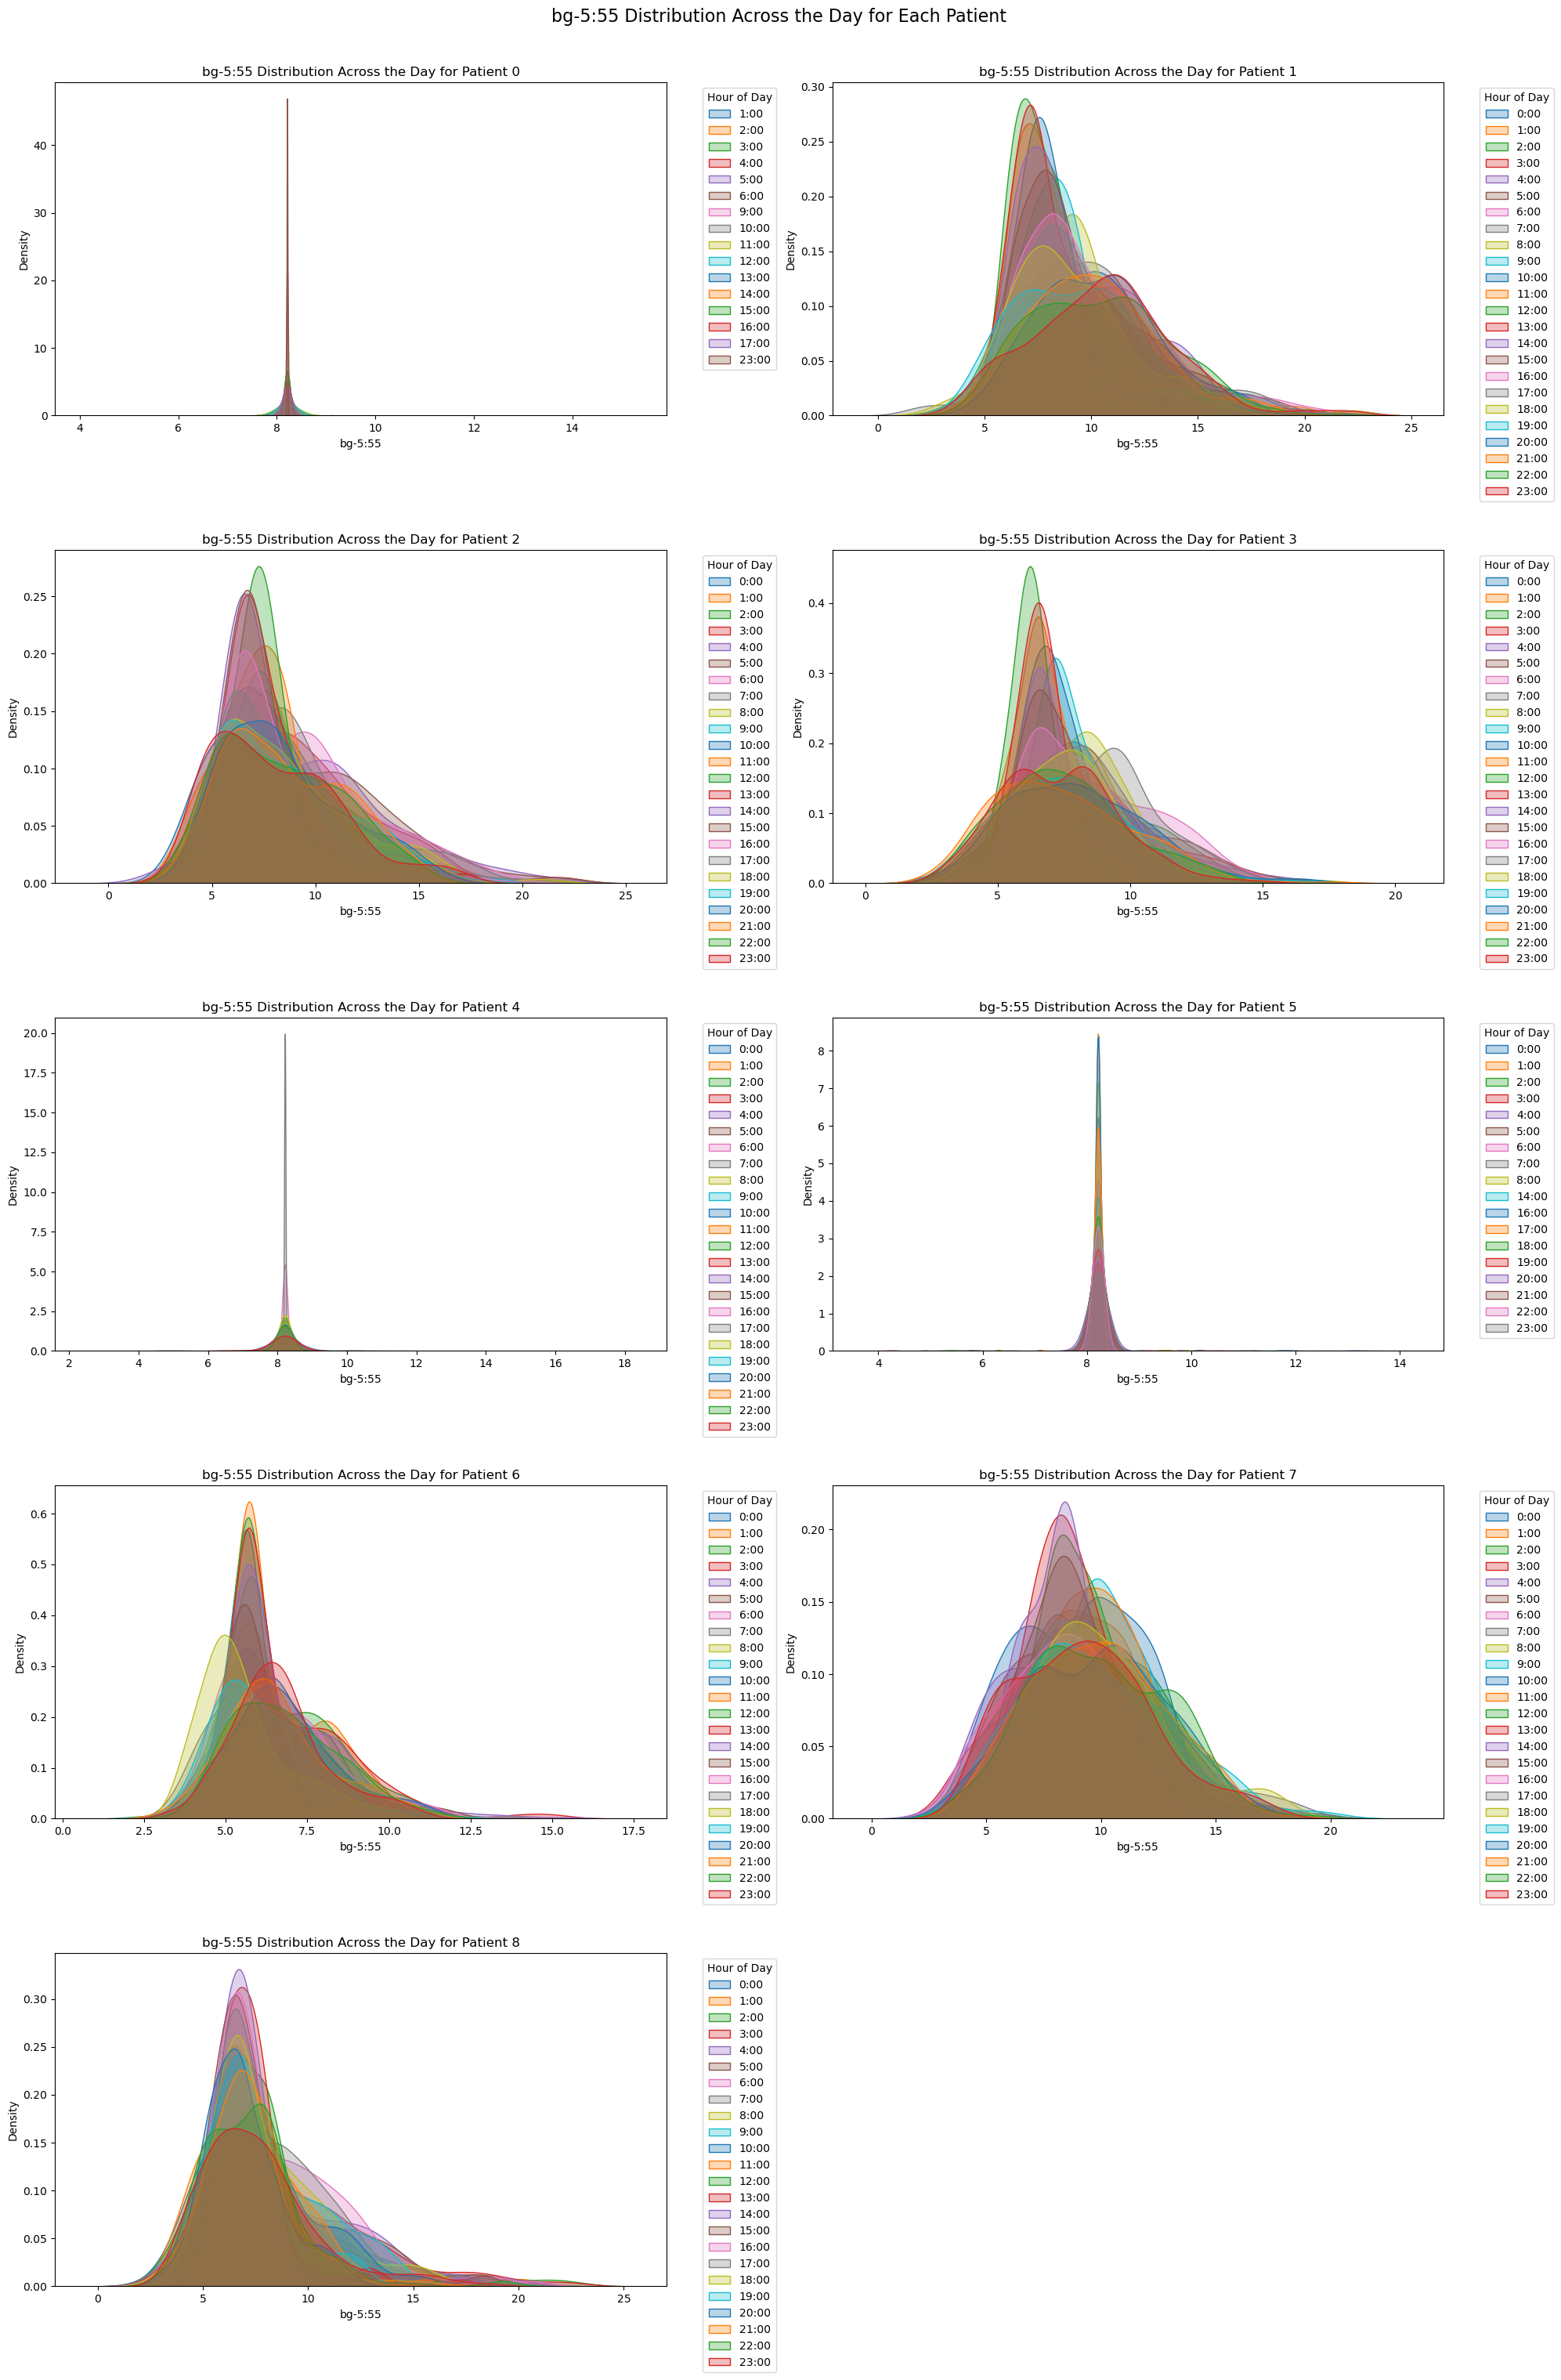

In [ ]:
def plot_variable_ridge(variable_name):
    num_rows = (num_patients + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 6 * num_rows))
    axes = axes.flatten()

    # Ensure the variable exists in the dataset
    if variable_name not in train_data.columns:
        raise ValueError(f"{variable_name} is not a valid column in the dataset.")

    train_data_copy = train_data.copy()

    # Group by patient and plot for each
    for idx, (patient_id, patient_data) in enumerate(train_data_copy.groupby('p_num', observed=True)):
        ax = axes[idx]
        patient_values = patient_data[[variable_name, 'time']].dropna()

        if patient_values.empty:
            print(f"No data available for patient {patient_id} in variable '{variable_name}'. Skipping...")
            ax.axis('off')
            continue

        # Convert time to hours for easier interpretation
        patient_values['hour'] = pd.to_datetime(patient_values['time'], format='%H:%M:%S').dt.hour

        for hour in sorted(patient_values['hour'].unique()):
            subset = patient_values[patient_values['hour'] == hour][variable_name]

            # Check if the subset has enough variance
            if subset.nunique() > 1:
                sns.kdeplot(
                    subset,
                    ax=ax,
                    bw_adjust=1.2,  # Adjust smoothing
                    fill=True,
                    alpha=0.3,
                    label=f'{hour}:00',
                    warn_singular=False  # Suppress warnings for singular data
                )
            else:
                print(f"Skipping hour {hour} for patient {patient_id}: Insufficient variance.")

        # Set plot details
        ax.set_title(f'{variable_name} Distribution Across the Day for Patient {patient_id}')
        ax.set_xlabel(variable_name)
        ax.set_ylabel('Density')
        ax.legend(title='Hour of Day', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Hide unused axes
    for idx in range(len(train_data['p_num'].unique()), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.suptitle(f'{variable_name} Distribution Across the Day for Each Patient', fontsize=16, y=1.02)
    plt.show()

plot_variable_ridge('bg-5:55')

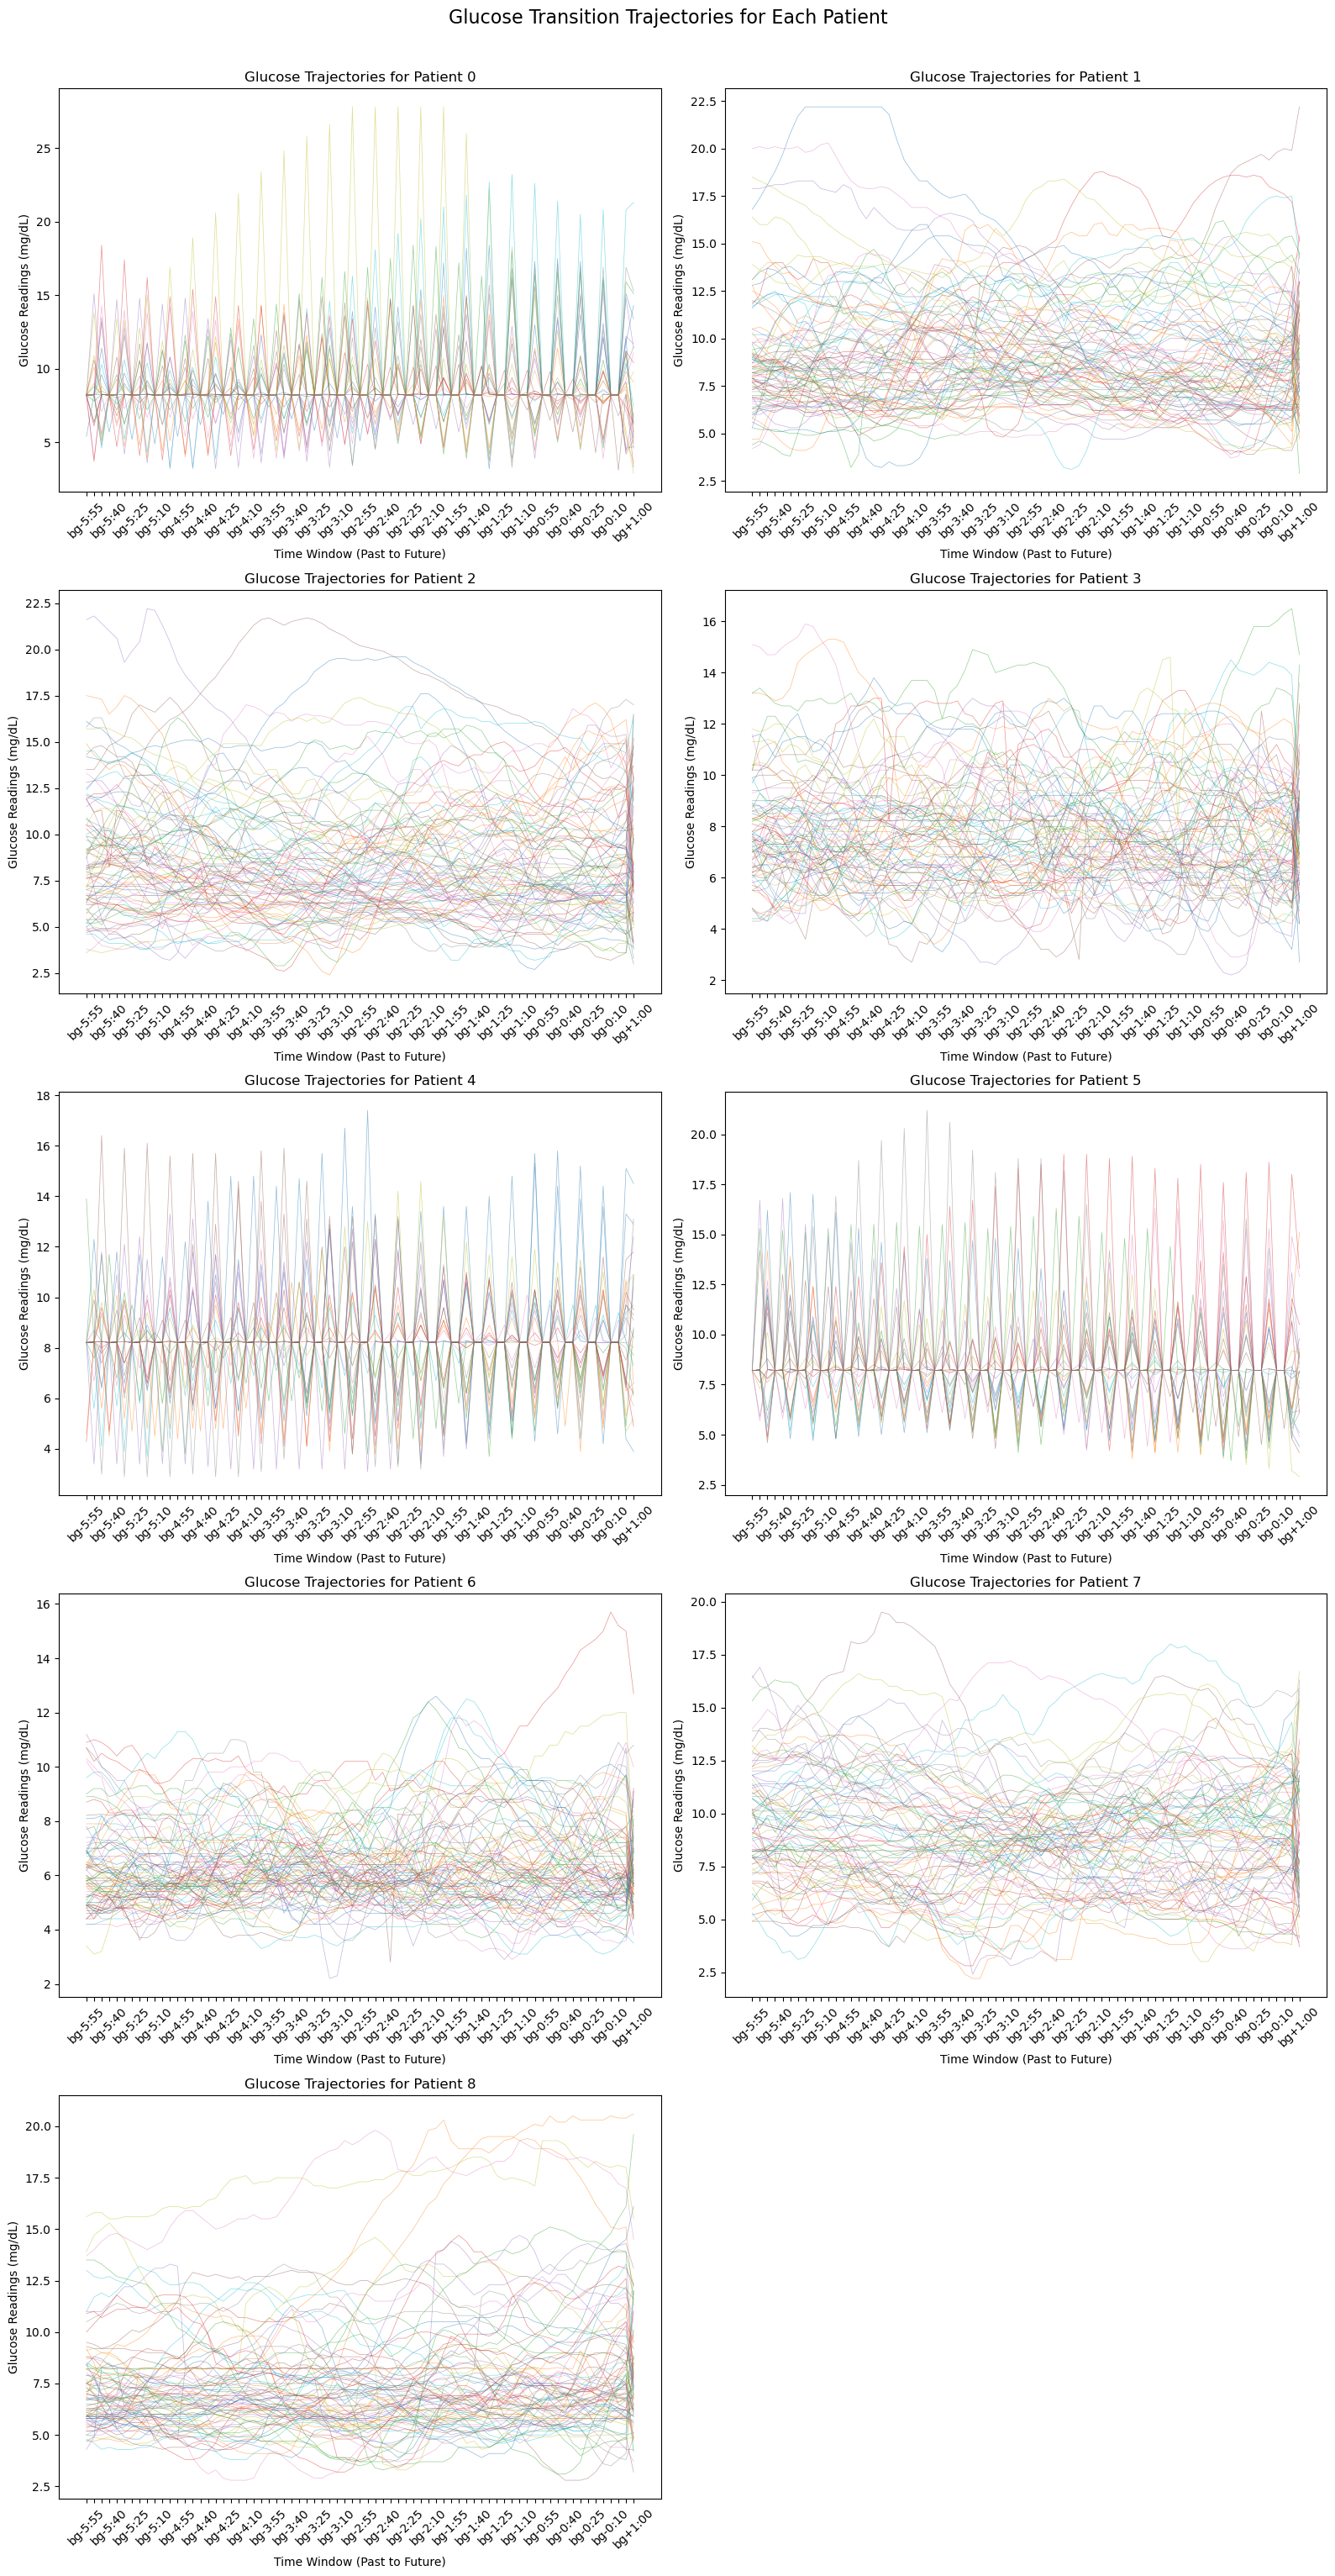

In [ ]:
def generate_variable_columns(variable_name = 'bg', start_time='5:55', end_time='0:00', interval=5):
    # Convert start and end times to timedelta objects
    start_td = timedelta(hours=int(start_time.split(':')[0]), minutes=int(start_time.split(':')[1]))
    end_td = timedelta(hours=int(end_time.split(':')[0]), minutes=int(end_time.split(':')[1]))
    current_td = start_td

    # Generate column names
    columns = []
    while current_td >= end_td:
        hours, remainder = divmod(current_td.seconds, 3600)
        minutes = remainder // 60
        columns.append(f"{variable_name}-{hours}:{minutes:02d}")
        current_td -= timedelta(minutes=interval)

    # Include bg+1:00 for the future glucose reading
    columns.append("bg+1:00")
    return columns

def moving_avg(x, N=30):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

def plot_trajectory(variable_columns):
    num_rows = (num_patients + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, 6 * num_rows))
    axes = axes.flatten()

    for idx, (patient_id, patient_data) in enumerate(train_data.groupby('p_num', observed=True)):
        ax = axes[idx]

        # Extract relevant columns for trajectory
        data_subset = patient_data[variable_columns]

        # Plot each row (time trajectory) as a line
        for index, row in data_subset.iterrows():
            if index % 300 == 0:
                ax.plot(variable_columns, row.values, alpha=0.5, linewidth=0.5)

        # Add titles and labels
        ax.set_title(f'Glucose Trajectories for Patient {patient_id}')
        ax.set_xlabel('Time Window (Past to Future)')
        ax.set_ylabel('Glucose Readings (mg/dL)')
        ax.set_xticks(range(len(variable_columns)))
        ax.set_xticklabels(variable_columns, rotation=45)
        [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % 3 != 0]

    # Turn off unused subplots
    for idx in range(num_patients, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.suptitle('Glucose Transition Trajectories for Each Patient', fontsize=16, y=1.02)
    plt.show()

variable_columns = generate_variable_columns()
plot_trajectory(variable_columns)

Keep below step at the bottom of the code

In [18]:
train_data.to_csv('train.csv', index=False)

# print("cleaning up data files...")
# for file in glob.glob('../data/*.csv'):
#     os.remove(file)
#     print(f"Removed: {file}")

if os.path.exists('../data/activities.txt'):
    os.remove('../data/activities.txt')
    print("Removed: activities.txt")

In [54]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [55]:
# Separate features and target
target_col = 'bg+1:00'
X = train_data.drop(columns=[target_col])
y = train_data[target_col]

In [56]:
X.shape, y.shape

((177024, 362), (177024,))

In [59]:
# Ensure target is numeric
y = y.astype(float)
y.dtype

dtype('float64')

In [60]:
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    enable_categorical=True,  # Enable categorical support
    random_state=42
)

In [62]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [63]:
# Predict on validation set
y_pred_val = xgb_model.predict(X_val)

In [64]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f"Validation RMSE: {rmse}")

Validation RMSE: 1.9436602040153508


In [66]:
test_data.head()

p_num      time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  bg-5:30  \
0      9  06:45:00      NaN      9.2      NaN      NaN     10.2      NaN   
1      9  11:25:00      NaN      NaN      9.9      NaN      NaN      9.4   
2      9  14:45:00      NaN      5.5      NaN      NaN      5.5      NaN   
3      9  04:30:00      NaN      3.4      NaN      NaN      3.9      NaN   
4      9  04:20:00      NaN      NaN      8.3      NaN      NaN     10.0   

   bg-5:25  bg-5:20  ...  activity-0:45  activity-0:40  activity-0:35  \
0      NaN     10.3  ...            NaN            NaN            NaN   
1      NaN      NaN  ...            NaN            NaN            NaN   
2      NaN      5.2  ...            NaN            NaN            NaN   
3      NaN      4.7  ...            NaN            NaN            NaN   
4      NaN      NaN  ...            NaN            NaN            NaN   

   activity-0:30  activity-0:25  activity-0:20  activity-0:15  activity-0:10  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN           Walk   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   

   activity-0:05  activity-0:00  
0            NaN            NaN  
1           Walk           Walk  
2            NaN            NaN  
3            NaN            NaN  
4            NaN            NaN  

[5 rows x 506 columns]